# Settings

## Language

In [ ]:
language = 'pt'

Available languages:

In [ ]:
default_language = 'en'

In [ ]:
language_list = ['pt', 'en']

In [ ]:
if default_language not in language_list:
    raise ValueError(f"language {default_language} not in 'language_list' {language_list}!")

In [ ]:
if language not in language_list:
    print(f"Warning: language {language} not in 'language_list' {language_list}! The default language {default_language} will be used instead.")
    language = default_language

# Importing libraries

## File management libraries

In [ ]:
from pathlib import Path
from google.colab import drive
import shutil
import zipfile
import gzip
import json

## Machine learning libraries

In [ ]:
!pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 13.4 MB/s 


In [ ]:
!pip install -U tensorboard_plugin_profile

     |████████████████████████████████| 1.1 MB 14.6 MB/s 


In [ ]:
!pip install medpy PyYAML==5.4.1 pillow colorlog tensorboardX

     |████████████████████████████████| 151 kB 12.8 MB/s 
     |████████████████████████████████| 636 kB 76.7 MB/s 
     |████████████████████████████████| 124 kB 92.5 MB/s 
     |████████████████████████████████| 48.4 MB 1.1 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754461 sha256=0f2da6f73f78fe2b11b24532ce3d17c0d26b5dfdea8aa9794f4fe729b4fc3bfd
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
import random
import scipy.ndimage
import skimage.transform
import nibabel as nib
import SimpleITK as sitk
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
%matplotlib inline

# Enable the usage of GPU or TPU inside Google Colab

1.   Élément de liste
2.   Élément de liste




Edit -> Notebook Settings -> GPU or TPU

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6066190979728287908
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15349841920
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4657835238524676986
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

# Create file system environment for the dataset


## Filenames

In [ ]:
aneurysms_filename = 'aneurysms.nii'
struct_aligned_filename = 'struct_aligned.nii'
struct_filename = 'struct.nii'
tof_filename = 'TOF.nii'

aneurysms_gz_filename = aneurysms_filename + '.gz'
struct_aligned_gz_filename = struct_aligned_filename + '.gz'
struct_gz_filename = struct_filename + '.gz'
tof_gz_filename = tof_filename + '.gz'

scan_params_struct_filename = 'ScanParams_struct.json'
scan_params_tof_filename = 'ScanParams_TOF.json'
reg_struct_to_tof_filename = 'reg_struct_to_TOF.txt'
location_filename = 'location.txt'

## Download dataset from Google Drive



Mount Drive in order to retain files between sessions



In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /home
!ls

/home


In [ ]:
drive_project_path = Path("/gdrive/MyDrive/Poli/Poli 2021/TCC2/ADAM")
if not drive_project_path.exists():
    raise FileNotFoundError(f"{drive_project_path.as_posix()} not found!")

In [ ]:
drive_dataset_path = drive_project_path / "dataset"
if not drive_dataset_path.exists():
    raise FileNotFoundError(f"{drive_dataset_path.as_posix()} not found!")

In [ ]:
drive_images_path = drive_project_path / "images"
if not drive_images_path.exists():
    raise FileNotFoundError(f"{drive_images_path.as_posix()} not found!")

In [ ]:
drive_models_path = drive_project_path / "models"
if not drive_models_path.exists():
    raise FileNotFoundError(f"{drive_models_path.as_posix()} not found!")

In [ ]:
home_path = Path('/home')
if not home_path.exists():
    raise FileNotFoundError(f"{home_path.as_posix()} not found!")

In [ ]:
dataset_zip_path = home_path / 'dataset_zip'
if dataset_zip_path.exists():
    raise FileExistsError(f"{dataset_zip_path.as_posix()} already exists!")

In [ ]:
dataset_path = home_path / 'dataset'
if dataset_path.exists():
    raise FileExistsError(f"{dataset_path.as_posix()} already exists!")

In [ ]:
shutil.copytree(drive_dataset_path, dataset_zip_path)

PosixPath('/home/dataset_zip')

### Verify download

In [ ]:
def print_tree(path):
    if isinstance(path, str):
        _path = Path(path)
    elif isinstance(path, Path):
        _path = path
    else:
        raise TypeError(f'path must be a string or a pathlib.Path object, got {type(path)}')
    if _path.exists():
        print(_path.as_posix())
        if _path.is_dir():
            for subpath in _path.glob('*'):
                print_tree(subpath)
    else:
        raise FileNotFoundError(f"{_path.as_posix()} not found!")

In [ ]:
print_tree(dataset_zip_path)

/home/dataset_zip
/home/dataset_zip/10056B.zip
/home/dataset_zip/10054F.zip
/home/dataset_zip/10071B.zip
/home/dataset_zip/10067B.zip
/home/dataset_zip/10054B.zip
/home/dataset_zip/10035.zip
/home/dataset_zip/10045B.zip
/home/dataset_zip/10063F.zip
/home/dataset_zip/10047F.zip
/home/dataset_zip/10047B.zip
/home/dataset_zip/10015.zip
/home/dataset_zip/10027.zip
/home/dataset_zip/10058F.zip
/home/dataset_zip/10062B.zip
/home/dataset_zip/10025.zip
/home/dataset_zip/10064F.zip
/home/dataset_zip/10005.zip
/home/dataset_zip/10070F.zip
/home/dataset_zip/10017.zip
/home/dataset_zip/10007.zip
/home/dataset_zip/10038.zip
/home/dataset_zip/10012.zip
/home/dataset_zip/10052F.zip
/home/dataset_zip/10051B.zip
/home/dataset_zip/10071F.zip
/home/dataset_zip/10018.zip
/home/dataset_zip/10023.zip
/home/dataset_zip/10048B.zip
/home/dataset_zip/10029.zip
/home/dataset_zip/10075F.zip
/home/dataset_zip/10049B.zip
/home/dataset_zip/10032.zip
/home/dataset_zip/10001.zip
/home/dataset_zip/10057B.zip
/home/data

## Unzip dataset exams' zip files

In [ ]:
n_exams = sum(1 for exam_path in dataset_zip_path.glob('*'))
print(f"{dataset_zip_path.as_posix()} with {n_exams} files")

for exam_i, exam_path in enumerate(dataset_zip_path.glob('*')):
    if (100 * exam_i // n_exams) % 5 == 0:
        print(f"{exam_path.name:<10}   : {100 * exam_i / n_exams:2.1f} %")
    with zipfile.ZipFile(exam_path, 'r') as exam_zip:
        exam_zip.extractall(dataset_path)
    exam_path.unlink()

n_exams = sum(1 for exam_path in dataset_path.glob('*'))
print(f"{dataset_path.as_posix()} with {n_exams} files")

/home/dataset_zip with 113 files
10056B.zip   : 0.0 %
10054F.zip   : 0.9 %
10045B.zip   : 5.3 %
10058F.zip   : 10.6 %
10070F.zip   : 15.0 %
10017.zip    : 15.9 %
10051B.zip   : 20.4 %
10075F.zip   : 25.7 %
10059F.zip   : 30.1 %
10065F.zip   : 31.0 %
10069F.zip   : 35.4 %
10070B.zip   : 40.7 %
10055B.zip   : 45.1 %
10021.zip    : 50.4 %
10046B.zip   : 55.8 %
10060F.zip   : 60.2 %
10076B.zip   : 65.5 %
10060B.zip   : 70.8 %
10074F.zip   : 75.2 %
10077F.zip   : 80.5 %
10020.zip    : 85.8 %
10002.zip    : 90.3 %
10056F.zip   : 95.6 %
/home/dataset with 113 files


### Verify unzip exams

In [ ]:
print_tree(dataset_zip_path)

/home/dataset_zip


In [ ]:
print_tree(dataset_path)

/home/dataset
/home/dataset/10035
/home/dataset/10035/aneurysms.nii.gz
/home/dataset/10035/orig
/home/dataset/10035/orig/ScanParams_TOF.json
/home/dataset/10035/orig/ScanParams_struct.json
/home/dataset/10035/orig/reg_struct_to_TOF.txt
/home/dataset/10035/orig/TOF.nii.gz
/home/dataset/10035/orig/struct.nii.gz
/home/dataset/10035/orig/struct_aligned.nii.gz
/home/dataset/10035/location.txt
/home/dataset/10035/pre
/home/dataset/10035/pre/TOF.nii.gz
/home/dataset/10035/pre/struct.nii.gz
/home/dataset/10035/pre/struct_aligned.nii.gz
/home/dataset/10015
/home/dataset/10015/aneurysms.nii.gz
/home/dataset/10015/orig
/home/dataset/10015/orig/ScanParams_TOF.json
/home/dataset/10015/orig/ScanParams_struct.json
/home/dataset/10015/orig/reg_struct_to_TOF.txt
/home/dataset/10015/orig/TOF.nii.gz
/home/dataset/10015/orig/struct.nii.gz
/home/dataset/10015/orig/struct_aligned.nii.gz
/home/dataset/10015/location.txt
/home/dataset/10015/pre
/home/dataset/10015/pre/TOF.nii.gz
/home/dataset/10015/pre/struct

In [ ]:
dataset_zip_path.rmdir()

## Unzip 3D gzip images 

In [ ]:
n_exams = sum(1 for exam_path in dataset_path.glob('*'))

for exam_i, exam_path in enumerate(dataset_path.glob('*'), 1):

    if (100 * exam_i // n_exams) % 5 == 0:
        print(f"{exam_path.as_posix():<12}   : {100 * exam_i / n_exams:2.1f} %")

    # Unzip aneurysms
    with gzip.open(exam_path / aneurysms_gz_filename, 'rb') as aneurysm_gz:
        aneurysm_data = aneurysm_gz.read()
    with open(exam_path / aneurysms_filename, 'wb') as aneurysm_nii:
        aneurysm_nii.write(aneurysm_data)
    del aneurysm_data
    (exam_path / aneurysms_gz_filename).unlink()

    # Unzip TOF-MRA
    with gzip.open(exam_path / 'pre' / tof_gz_filename, 'rb') as tof_gz:
        tof_data = tof_gz.read()
    with open(exam_path / 'pre' / tof_filename, 'wb') as tof_nii:
        tof_nii.write(tof_data)
    del tof_data
    (exam_path / 'pre' / tof_gz_filename).unlink()

    # Unzip struct FLAIR
    with gzip.open(exam_path / 'pre' / struct_gz_filename, 'rb') as struct_gz:
        struct_data = struct_gz.read()
    with open(exam_path / 'pre' / struct_filename, 'wb') as struct_nii:
        struct_nii.write(struct_data)
    del struct_data
    (exam_path / 'pre' / struct_gz_filename).unlink()

    # Unzip struct aligned FLAIR
    with gzip.open(exam_path / 'pre' / struct_aligned_gz_filename, 'rb') as struct_aligned_gz:
        struct_aligned_data = struct_aligned_gz.read()
    with open(exam_path / 'pre' / struct_aligned_filename, 'wb') as struct_aligned_nii:
        struct_aligned_nii.write(struct_aligned_data)
    del struct_aligned_data
    (exam_path / 'pre' / struct_aligned_gz_filename).unlink()

/home/dataset/10035   : 0.9 %
/home/dataset/10012   : 5.3 %
/home/dataset/10038   : 10.6 %
/home/dataset/10031   : 15.0 %
/home/dataset/10060B   : 15.9 %
/home/dataset/10016   : 20.4 %
/home/dataset/10056F   : 25.7 %
/home/dataset/10059F   : 30.1 %
/home/dataset/10047F   : 31.0 %
/home/dataset/10065B   : 35.4 %
/home/dataset/10062B   : 40.7 %
/home/dataset/10022   : 45.1 %
/home/dataset/10037   : 50.4 %
/home/dataset/10076F   : 55.8 %
/home/dataset/10070F   : 60.2 %
/home/dataset/10046B   : 65.5 %
/home/dataset/10006   : 70.8 %
/home/dataset/10054F   : 75.2 %
/home/dataset/10064F   : 80.5 %
/home/dataset/10004   : 85.8 %
/home/dataset/10077F   : 90.3 %
/home/dataset/10068F   : 95.6 %
/home/dataset/10053B   : 100.0 %


### Verify unzip gzip 3D images

In [ ]:
print_tree(dataset_path)

/home/dataset
/home/dataset/10035
/home/dataset/10035/orig
/home/dataset/10035/orig/ScanParams_TOF.json
/home/dataset/10035/orig/ScanParams_struct.json
/home/dataset/10035/orig/reg_struct_to_TOF.txt
/home/dataset/10035/orig/TOF.nii.gz
/home/dataset/10035/orig/struct.nii.gz
/home/dataset/10035/orig/struct_aligned.nii.gz
/home/dataset/10035/location.txt
/home/dataset/10035/aneurysms.nii
/home/dataset/10035/pre
/home/dataset/10035/pre/struct.nii
/home/dataset/10035/pre/TOF.nii
/home/dataset/10035/pre/struct_aligned.nii
/home/dataset/10015
/home/dataset/10015/orig
/home/dataset/10015/orig/ScanParams_TOF.json
/home/dataset/10015/orig/ScanParams_struct.json
/home/dataset/10015/orig/reg_struct_to_TOF.txt
/home/dataset/10015/orig/TOF.nii.gz
/home/dataset/10015/orig/struct.nii.gz
/home/dataset/10015/orig/struct_aligned.nii.gz
/home/dataset/10015/location.txt
/home/dataset/10015/aneurysms.nii
/home/dataset/10015/pre
/home/dataset/10015/pre/struct.nii
/home/dataset/10015/pre/TOF.nii
/home/dataset

# Visualization

## Visualization of one exam

In [ ]:
exam_path = dataset_path / '10072F'
if not exam_path.exists():
    raise FileNotFoundError

### Settings

In [ ]:
for p in (exam_path / 'orig').glob('*.txt'):
    print(p.as_posix())
    with open(p, 'r') as f:
        print(f.read())
    print()

/home/dataset/10072F/orig/reg_struct_to_TOF.txt
(Transform "EulerTransform")
(NumberOfParameters 6)
(TransformParameters -0.021050 -0.004280 0.004742 -0.165239 0.904403 0.412796)
(InitialTransformParametersFileName "NoInitialTransform")
(UseBinaryFormatForTransformationParameters "false")
(HowToCombineTransforms "Compose")

// Image specific
(FixedImageDimension 3)
(MovingImageDimension 3)
(FixedInternalImagePixelType "float")
(MovingInternalImagePixelType "float")
(Size 512 512 138)
(Index 0 0 0)
(Spacing 0.3906250000 0.3906250000 0.5000007153)
(Origin -109.6898956299 -99.0618286133 -17.5089664459)
(Direction 0.9953964540 -0.0891246346 -0.0352519332 0.0767558250 0.9615505331 -0.2636837418 0.0573972322 0.2597640654 0.9639648272)
(UseDirectionCosines "true")

// EulerTransform specific
(CenterOfRotationPoint -0.7182144541 -3.0927024840 -14.3283055132)
(ComputeZYX "false")

// ResampleInterpolator specific
(ResampleInterpolator "FinalBSplineInterpolator")
(FinalBSplineInterpolationOrder 

In [ ]:
for p in (exam_path / 'orig').glob('*.json'):
    print(p.as_posix())
    with open(p, 'r') as f:
        json_contents = json.load(f)
    for key in json_contents:
        print(f"{p.stem}[{key}] = {json_contents[key]}")
    print()

/home/dataset/10072F/orig/ScanParams_TOF.json
ScanParams_TOF[Modality] = 3D TOF-MRA
ScanParams_TOF[MagneticFieldStrength] = 1.5
ScanParams_TOF[RepetitionTime] = 25.0
ScanParams_TOF[EchoTime] = 3.55

/home/dataset/10072F/orig/ScanParams_struct.json
ScanParams_struct[Modality] = FLAIR
ScanParams_struct[MagneticFieldStrength] = 1.5
ScanParams_struct[RepetitionTime] = 6158.55
ScanParams_struct[EchoTime] = 100.0



### Aneurysm Location

In [ ]:
with open(exam_path / location_filename, 'r') as f:
    aneurysm_location = tuple(f.read().split(', '))
    aneurysm_location = int(aneurysm_location[2]), int(aneurysm_location[1]), int(aneurysm_location[0]), float(aneurysm_location[3])

print(aneurysm_location)

(59, 243, 248, 4.14)


According to http://adam.isi.uu.nl/data/manual-reference-standard/ , these location represents:

- the x coordinate of the centre of mass of the aneurysm,
- the y coordinate of the centre of mass of the aneurysm,
- the z coordinate of the centre of mass of the aneurysm,
- the maximum radius of the aneurysm

### Aneurysms Segmentation Mask

In [ ]:
aneurysm_img_nii = sitk.ReadImage((exam_path / aneurysms_filename).absolute().as_posix(), imageIO='NiftiImageIO')

In [ ]:
type(aneurysm_img_nii)

SimpleITK.SimpleITK.Image

In [ ]:
aneurysm_img_np = sitk.GetArrayViewFromImage(aneurysm_img_nii)

In [ ]:
print(f"Image shape: {aneurysm_img_np.shape}, type: {aneurysm_img_np.dtype}")

Image shape: (138, 512, 512), type: int16


In [ ]:
print(f"Unique values: {np.unique(aneurysm_img_np)}")

Unique values: [0 1 2]


According to http://adam.isi.uu.nl/data/manual-reference-standard/ , we have the following labels:

- 0 = Background
- 1 = Untreated, unruptured aneurysm
- 2 = Treated aneurysms or artefacts resulting from treated aneurysms

In [ ]:
print(f"Number of background voxels:                         {np.sum(aneurysm_img_np[aneurysm_img_np == 0.] + 1):>10.0f}")
print(f"Number of unruptured, untreated aneurysm voxels:     {np.sum(aneurysm_img_np[aneurysm_img_np == 1.]):>10.0f}")
print(f"Number of treated or ruptured aneurysms voxels:      {np.sum(aneurysm_img_np[aneurysm_img_np == 2.] - 1):>10.0f}")

Number of background voxels:                           36175245
Number of unruptured, untreated aneurysm voxels:            364
Number of treated or ruptured aneurysms voxels:             263


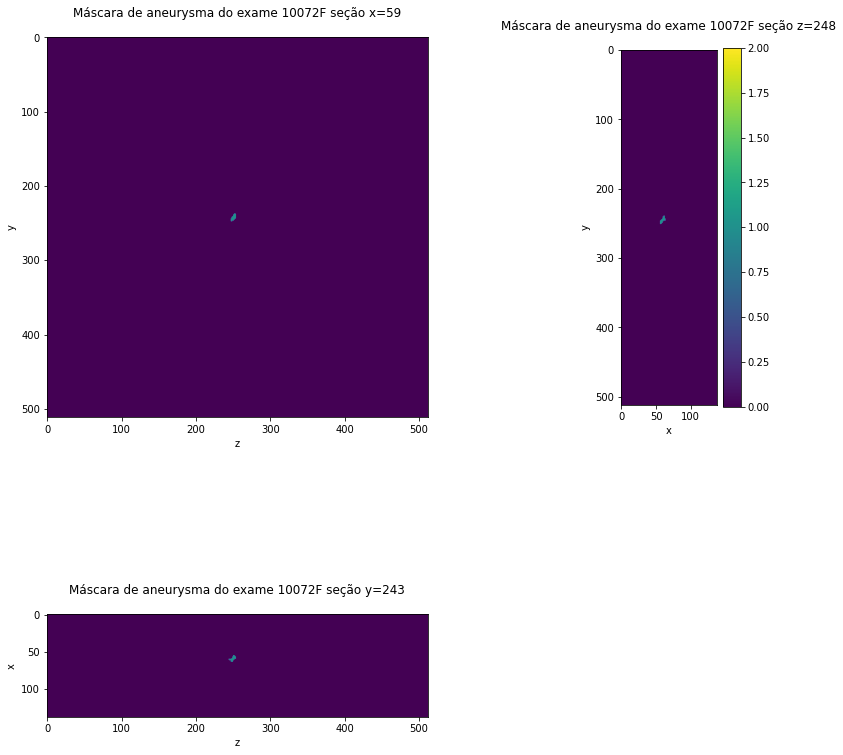

In [ ]:
fig = plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(aneurysm_img_np[aneurysm_location[0], :, :], vmin=0., vmax=2.)
if language == 'en':
    plt.title(f'Aneurysm mask of exam {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'Máscara de aneurysma do exame {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(aneurysm_img_np[:, aneurysm_location[1], :], vmin=0., vmax=2.)
if language == 'en':
    plt.title(f'Aneurysm mask of exam {exam_path.name} slice y={aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'Máscara de aneurysma do exame {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(aneurysm_img_np[:, :, aneurysm_location[2]]), vmin=0., vmax=2.)
if language == 'en':
    plt.title(f'Aneurysm mask of exam {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'Máscara de aneurysma do exame {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_aneurysm_mask.png'), dpi=300, bbox_inches='tight')

### Preprocecessed images

In [ ]:
for f in (exam_path / 'pre').glob('*'):
    print(f)

/home/dataset/10072F/pre/struct.nii
/home/dataset/10072F/pre/TOF.nii
/home/dataset/10072F/pre/struct_aligned.nii


In [ ]:
struct_itk = sitk.ReadImage((exam_path / 'pre' / struct_filename).absolute().as_posix(), imageIO='NiftiImageIO')
tof_itk = sitk.ReadImage((exam_path / 'pre' / tof_filename).absolute().as_posix(), imageIO='NiftiImageIO')
struct_aligned_itk = sitk.ReadImage((exam_path / 'pre' / struct_aligned_filename).absolute().as_posix(), imageIO='NiftiImageIO')

In [ ]:
struct_np = sitk.GetArrayViewFromImage(struct_itk)
tof_np = sitk.GetArrayViewFromImage(tof_itk)
struct_aligned_np = sitk.GetArrayViewFromImage(struct_aligned_itk)

In [ ]:
print(f'File: struct.nii            Shape: {struct_np.shape}    Type: {struct_np.dtype}')
print(f'File: TOF.nii               Shape: {tof_np.shape}    Type: {tof_np.dtype}')
print(f'File: struct_aligned.nii    Shape: {struct_aligned_np.shape}    Type: {struct_aligned_np.dtype}')

File: struct.nii            Shape: (17, 256, 256)    Type: float32
File: TOF.nii               Shape: (138, 512, 512)    Type: float32
File: struct_aligned.nii    Shape: (138, 512, 512)    Type: float32


In [ ]:
struct_min, struct_max = struct_np.min(), struct_np.max()
tof_min, tof_max = tof_np.min(), tof_np.max()
struct_aligned_min, struct_aligned_max = struct_aligned_np.min(), struct_aligned_np.max()

print(f'File: struct.nii            Values: {struct_min} - {struct_max}')
print(f'File: TOF.nii               Values: {tof_min} - {tof_max}')
print(f'File: strcut_aligned.nii    Values: {struct_aligned_min} - {struct_aligned_max}')

File: struct.nii            Values: 0.0 - 1300.08447265625
File: TOF.nii               Values: 0.0 - 241.210693359375
File: strcut_aligned.nii    Values: -117.0 - 1327.0


#### TOF-MRA

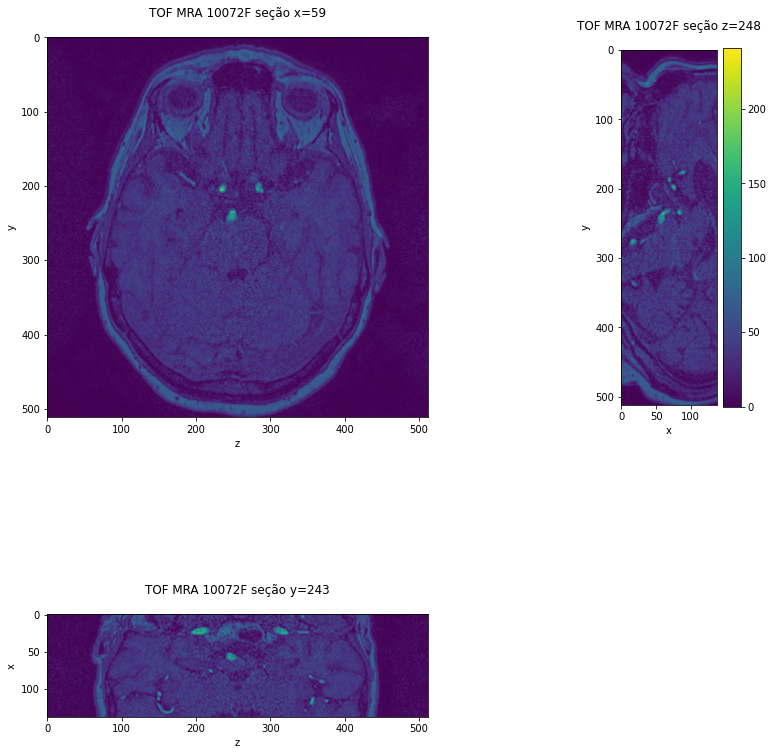

In [ ]:
fig = plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(tof_np[aneurysm_location[0], :, :], vmin=tof_min, vmax=tof_max)
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(tof_np[:, aneurysm_location[1], :], vmin=tof_min, vmax=tof_max)
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} section y={aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(tof_np[:, :, aneurysm_location[2]]), vmin=tof_min, vmax=tof_max)
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_tof_mra.png'), bbox_inches='tight', dpi=300)

#### FLAIR aligned with TOF-MRA

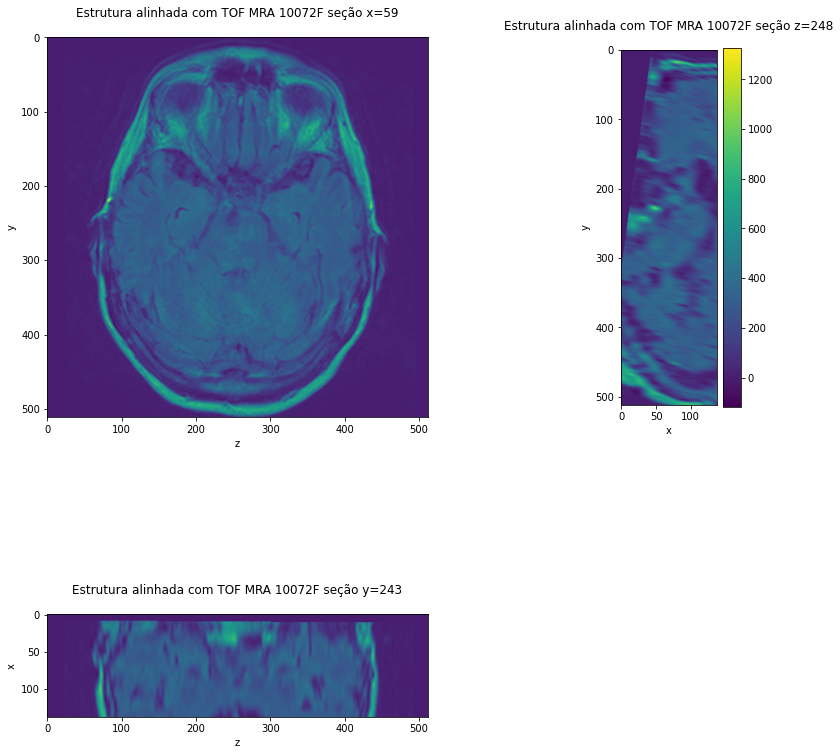

In [ ]:
fig = plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(struct_aligned_np[aneurysm_location[0], :, :], vmin=struct_aligned_min, vmax=struct_aligned_max)
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(struct_aligned_np[:, aneurysm_location[1], :], vmin=struct_aligned_min, vmax=struct_aligned_max)
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice y={aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(struct_aligned_np[:, :, aneurysm_location[2]]), vmin=struct_aligned_min, vmax=struct_aligned_max)
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_struct_aligned.png'), dpi=300, bbox_inches='tight')

#### Raw FLAIR

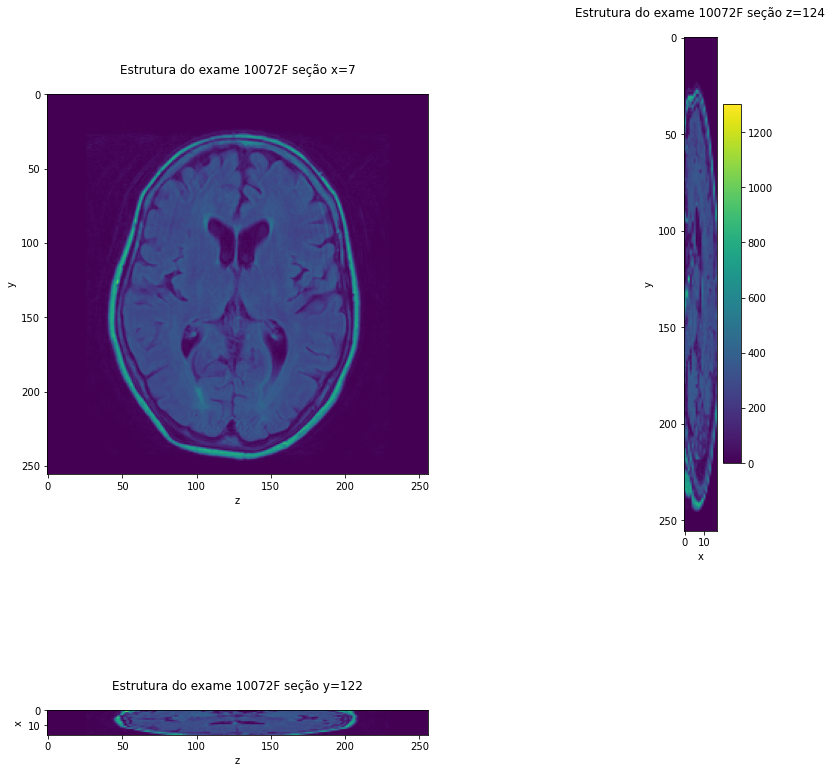

In [ ]:
fig = plt.figure(figsize=(15, 20))

struct_aneurysm_location = (round(aneurysm_location[0] * struct_np.shape[0] / struct_aligned_np.shape[0]),
                            round(aneurysm_location[1] * struct_np.shape[1] / struct_aligned_np.shape[1]),
                            round(aneurysm_location[2] * struct_np.shape[2] / struct_aligned_np.shape[2]))

plt.subplot(2,2,1)
plt.imshow(struct_np[struct_aneurysm_location[0], :, :], vmin=struct_min, vmax=struct_max)
if language == 'en':
    plt.title(f'Structure of exam {exam_path.name} slice x={struct_aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura do exame {exam_path.name} seção x={struct_aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(struct_np[:, struct_aneurysm_location[1], :], vmin=struct_min, vmax=struct_max)
if language == 'en':
    plt.title(f'Structure of exam {exam_path.name} slice y={struct_aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura do exame {exam_path.name} seção y={struct_aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(struct_np[:, :, struct_aneurysm_location[2]]), vmin=struct_min, vmax=struct_max)
if language == 'en':
    plt.title(f'Structure of exam {exam_path.name} slice z={struct_aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura do exame {exam_path.name} seção z={struct_aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_raw_struct.png'), dpi=300, bbox_inches='tight')

We can see that the aligment between the structure and the TOF isn't just change of scale, a rotation and a translation are involved too.

The distorsions due to the aligment provoke some blur mainly to the z axis.

#### TOF-MRA with untreated unruptured aneurysm annotated

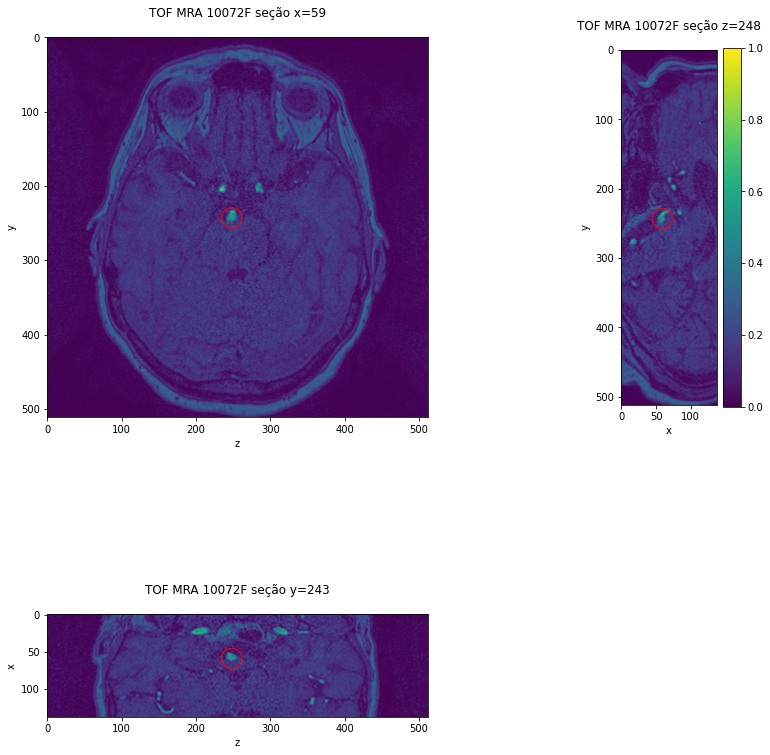

In [ ]:
fig = plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(tof_np[aneurysm_location[0], :, :], vmin=tof_min, vmax=tof_max)
plt.scatter(aneurysm_location[2], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(tof_np[:, aneurysm_location[1], :], vmin=tof_min, vmax=tof_max)
plt.scatter(aneurysm_location[2], aneurysm_location[0], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} slice y={aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(tof_np[:, :, aneurysm_location[2]]), vmin=tof_min, vmax=tof_max)
plt.scatter(aneurysm_location[0], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'TOF MRA {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'TOF MRA {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_annotated_tof_mra.png'), dpi=300, bbox_inches='tight')

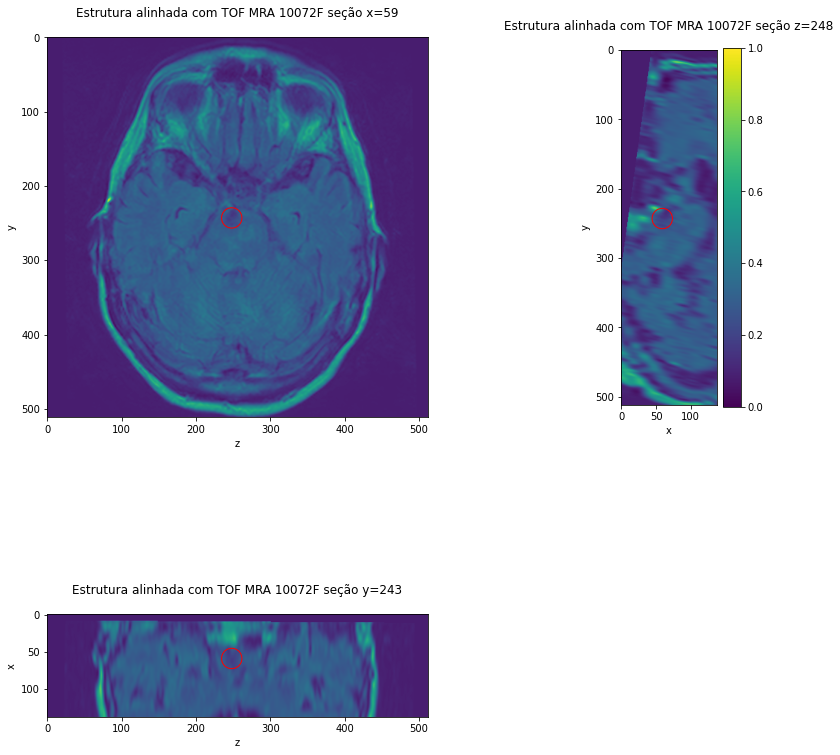

In [ ]:
fig = plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
plt.imshow(struct_aligned_np[aneurysm_location[0], :, :], vmin=struct_aligned_min, vmax=struct_aligned_max)
plt.scatter(aneurysm_location[2], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
plt.xlabel('z')
plt.ylabel('y')

plt.subplot(4,2,5)
plt.imshow(struct_aligned_np[:, aneurysm_location[1], :], vmin=struct_aligned_min, vmax=struct_aligned_max)
plt.scatter(aneurysm_location[2], aneurysm_location[0], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice y={aneurysm_location[1]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
plt.xlabel('z')
plt.ylabel('x')

plt.subplot(2,6,5)
plt.imshow(np.transpose(struct_aligned_np[:, :, aneurysm_location[2]]), vmin=struct_aligned_min, vmax=struct_aligned_max)
plt.scatter(aneurysm_location[0], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
if language == 'en':
    plt.title(f'Structure aligned with TOF MRA {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
elif language == 'pt':
    plt.title(f'Estrutura alinhada com TOF MRA {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.savefig(drive_images_path / (exam_path.stem + '_annotated_struct_aligned.png'), dpi=300, bbox_inches='tight')

## Visualization of the dataset

### Settings

In [ ]:
exams_list = []
struct_modality_list = []
struct_magnetic_field_strength_list = []
struct_repetition_time_list = []
struct_echo_time_list = []
tof_modality_list = []
tof_magnetic_field_strength_list = []
tof_repetition_time_list = []
tof_echo_time_list = []

unpredicted_list = []

for exam_i, exam_path in enumerate(dataset_path.glob('*')):

    exams_list.append(exam_path.stem)

    for json_path in (exam_path / 'orig').glob('*struct.json'):
        with open(json_path, 'r') as json_file:
            json_data = json.load(json_file)
        for key in json_data:
            if key == 'Modality':
                struct_modality_list.append(json_data[key])
            elif key == 'MagneticFieldStrength':
                struct_magnetic_field_strength_list.append(json_data[key])
            elif key == 'RepetitionTime':
                struct_repetition_time_list.append(json_data[key])
            elif key == 'EchoTime':
                struct_echo_time_list.append(json_data[key])
            else:
                unpredicted.append((key, json_data[key]))
    
    for json_path in (exam_path / 'orig').glob('*TOF.json'):
        with open(json_path, 'r') as json_file:
            json_data = json.load(json_file)
        for key in json_data:
            if key == 'Modality':
                tof_modality_list.append(json_data[key])
            elif key == 'MagneticFieldStrength':
                tof_magnetic_field_strength_list.append(json_data[key])
            elif key == 'RepetitionTime':
                tof_repetition_time_list.append(json_data[key])
            elif key == 'EchoTime':
                tof_echo_time_list.append(json_data[key])
            else:
                unpredicted.append((key, json_data[key]))


In [ ]:
print('Scan parameters of the structure files', end='\n\n')
print(f"Number of modality keys:                {len(struct_modality_list):>4}")
print(f"Number of magnetic field strength keys: {len(struct_magnetic_field_strength_list):>4}")
print(f"Number of repetition time keys:         {len(struct_repetition_time_list):>4}")
print(f"Number of echo time keys:               {len(struct_echo_time_list):>4}")
print()
print('Scan parameters of the TOF files', end='\n\n')
print(f"Number of modality keys:                {len(tof_modality_list):>4}")
print(f"Number of magnetic field strength keys: {len(tof_magnetic_field_strength_list):>4}")
print(f"Number of repetition time keys:         {len(tof_repetition_time_list):>4}")
print(f"Number of echo time keys:               {len(tof_echo_time_list):>4}")

Scan parameters of the structure files

Number of modality keys:                 113
Number of magnetic field strength keys:  113
Number of repetition time keys:          113
Number of echo time keys:                113

Scan parameters of the TOF files

Number of modality keys:                 113
Number of magnetic field strength keys:  113
Number of repetition time keys:          113
Number of echo time keys:                113


In [ ]:
print(unpredicted_list)

[]


In [ ]:
exams = pd.Series(exams_list, dtype=str)

struct_modality = pd.Series(struct_modality_list, index=exams)
struct_magnetic_field = pd.Series(struct_magnetic_field_strength_list, index=exams, dtype=np.float64)
struct_repetition_time = pd.Series(struct_repetition_time_list, index=exams, dtype=np.float64)
struct_echo_time = pd.Series(struct_echo_time_list, index=exams, dtype=np.float64)

tof_modality = pd.Series(tof_modality_list, index=exams)
tof_magnetic_field = pd.Series(tof_magnetic_field_strength_list, index=exams, dtype=np.float64)
tof_repetition_time = pd.Series(tof_repetition_time_list, index=exams, dtype=np.float64)
tof_echo_time = pd.Series(tof_echo_time_list, index=exams, dtype=np.float64)

scan_params_df = pd.DataFrame({'struct_Modality' : struct_modality,
                               'struct_Magnetic_Field' : struct_magnetic_field,
                               'struct_Repetition_Time' : struct_repetition_time,
                               'struct_Echo_Time' : struct_echo_time,
                               'TOF_Modality' : tof_modality,
                               'TOF_Magnetic_Field' : tof_magnetic_field, 
                               'TOF_Repetition_Time' : tof_repetition_time,
                               'TOF_Echo_Time' : tof_echo_time})

In [ ]:
scan_params_df.head()

struct_Modality  ...  TOF_Echo_Time
10035            FLAIR  ...           6.91
10015            FLAIR  ...           6.91
10030            FLAIR  ...           6.90
10067F              T2  ...           3.51
10036            FLAIR  ...           3.45

[5 rows x 8 columns]

In [ ]:
scan_params_df.describe()

struct_Magnetic_Field  ...  TOF_Echo_Time
count             113.000000  ...     113.000000
mean                2.000000  ...       5.248319
std                 0.734968  ...       1.870853
min                 1.000000  ...       2.280000
25%                 1.500000  ...       3.450000
50%                 1.500000  ...       5.610000
75%                 3.000000  ...       6.900000
max                 3.000000  ...      10.360000

[8 rows x 6 columns]

**Are the magnetic field strengths in the TOF MRA and in the struct the same for all exams?**

In [ ]:
(scan_params_df['struct_Magnetic_Field'] == scan_params_df['TOF_Magnetic_Field']).count() == len(scan_params_df)

True

In [ ]:
scan_params_df.describe(exclude=np.number)

struct_Modality TOF_Modality
count              113          113
unique               3            1
top              FLAIR   3D TOF-MRA
freq                76          113

Note that we have 3 different kinds of exams in the struct files while we always have the same type of exam (3D TOF-MRA) in the TOF files

**Types of struct exam:**

In [ ]:
scan_params_df['struct_Modality'].value_counts()

FLAIR    76
T2       36
T1        1
Name: struct_Modality, dtype: int64

In [ ]:
scan_params_df[scan_params_df['struct_Modality'] == 'FLAIR'].head()

struct_Modality  ...  TOF_Echo_Time
10035           FLAIR  ...           6.91
10015           FLAIR  ...           6.91
10030           FLAIR  ...           6.90
10036           FLAIR  ...           3.45
10012           FLAIR  ...           6.90

[5 rows x 8 columns]

In [ ]:
scan_params_df[scan_params_df['struct_Modality'] == 'T2'].head()

struct_Modality  ...  TOF_Echo_Time
10067F              T2  ...           3.51
10007               T2  ...           3.45
10041               T2  ...           6.91
10033               T2  ...           6.91
10011               T2  ...           3.46

[5 rows x 8 columns]

In [ ]:
scan_params_df[scan_params_df['struct_Modality'] == 'T1']

struct_Modality  ...  TOF_Echo_Time
10067B              T1  ...            6.9

[1 rows x 8 columns]

In [ ]:
scan_params_df[scan_params_df['struct_Modality'] == 'FLAIR'].describe()

struct_Magnetic_Field  ...  TOF_Echo_Time
count              76.000000  ...      76.000000
mean                1.861842  ...       5.588553
std                 0.666327  ...       1.859897
min                 1.000000  ...       2.290000
25%                 1.500000  ...       3.580000
50%                 1.500000  ...       6.900000
75%                 1.875000  ...       6.900000
max                 3.000000  ...      10.360000

[8 rows x 6 columns]

In [ ]:
scan_params_df[scan_params_df['struct_Modality'] == 'T2'].describe()

struct_Magnetic_Field  ...  TOF_Echo_Time
count              36.000000  ...      36.000000
mean                2.305556  ...       4.484167
std                 0.795324  ...       1.690495
min                 1.000000  ...       2.280000
25%                 1.500000  ...       3.450000
50%                 3.000000  ...       3.455000
75%                 3.000000  ...       6.652500
max                 3.000000  ...       8.110000

[8 rows x 6 columns]

### Aneurysm Localization

In [ ]:
exams_aneurysm_list = []
location_exams_list = []
aneurysm_x_list = []
aneurysm_y_list = []
aneurysm_z_list = []
aneurysm_r_list = []
n_aneurysms_dict = {}

for exam_i, exam_path in enumerate(dataset_path.glob('*')):

    with open((exam_path / location_filename), 'r') as location_file:
        location_data = location_file.read()

    if location_data != '':
        location_parts = location_data.split('\n')
        for part_i, location_part in enumerate(location_parts, 1):
            location_exams_list.append(exam_path.stem)
            exams_aneurysm_list.append(f"{exam_path.stem}_{part_i}")
            aneurysm_coordenates = location_part.split(', ')
            aneurysm_x_list.append(int(aneurysm_coordenates[2]))
            aneurysm_y_list.append(int(aneurysm_coordenates[1]))
            aneurysm_z_list.append(int(aneurysm_coordenates[0]))
            aneurysm_r_list.append(float(aneurysm_coordenates[3]))
        n_aneurysms_dict[exam_path.stem] = len(location_parts)
    else:
        n_aneurysms_dict[exam_path.stem] = 0

In [ ]:
exams_aneurysm = pd.Series(exams_aneurysm_list)
location_exams = pd.Series(location_exams_list, index=exams_aneurysm)
n_aneurysms = pd.Series(n_aneurysms_dict, dtype=np.int32)
aneurysm_x = pd.Series(aneurysm_x_list, index=exams_aneurysm, dtype=np.int32)
aneurysm_y = pd.Series(aneurysm_y_list, index=exams_aneurysm, dtype=np.int32)
aneurysm_z = pd.Series(aneurysm_z_list, index=exams_aneurysm, dtype=np.int32)
aneurysm_r = pd.Series(aneurysm_r_list, index=exams_aneurysm, dtype=np.float32)

aneurysms_location_df = pd.DataFrame({'Exam' : location_exams, 'x' : aneurysm_x, 'y' : aneurysm_y, 'z' : aneurysm_z, 'Radius (mm)' : aneurysm_r})

In [ ]:
scan_params_df['n_aneurysms'] = n_aneurysms

scan_params_df.head(10)

struct_Modality  struct_Magnetic_Field  ...  TOF_Echo_Time  n_aneurysms
10035            FLAIR                    1.5  ...           6.91            1
10015            FLAIR                    1.5  ...           6.91            0
10030            FLAIR                    1.5  ...           6.90            2
10067F              T2                    1.5  ...           3.51            1
10036            FLAIR                    3.0  ...           3.45            1
10012            FLAIR                    1.5  ...           6.90            0
10075B           FLAIR                    1.5  ...           2.30            1
10045B           FLAIR                    1.5  ...           6.90            1
10007               T2                    3.0  ...           3.45            0
10020            FLAIR                    3.0  ...           4.00            0

[10 rows x 9 columns]

In [ ]:
aneurysms_location_df.head()

Exam   x    y    z  Radius (mm)
10035_1    10035  64  212  354         5.52
10030_1    10030  65  213  303         3.84
10030_2    10030  64  224  208         0.70
10067F_1  10067F  65  195  177         4.20
10036_1    10036  36  234  267         4.21

In [ ]:
aneurysms_location_df.describe()

x          y           z  Radius (mm)
count  125.000000  125.00000  125.000000   125.000000
mean    61.648000  231.58400  271.864000     4.065040
std     22.364739   66.44646   90.551477     2.200553
min     16.000000   44.00000   37.000000     0.700000
25%     45.000000  206.00000  219.000000     2.270000
50%     60.000000  225.00000  261.000000     3.960000
75%     72.000000  244.00000  314.000000     5.450000
max    160.000000  514.00000  632.000000    15.920000

In [ ]:
scan_params_df['n_aneurysms'].describe()

count    113.000000
mean       1.106195
std        0.760202
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: n_aneurysms, dtype: float64

Number of unruptured and untreated aneurysms

In [ ]:
scan_params_df['n_aneurysms'].value_counts()

1    67
2    21
0    20
3     4
4     1
Name: n_aneurysms, dtype: int64

In [ ]:
100 * scan_params_df['n_aneurysms'].value_counts() / len(scan_params_df)

1    59.292035
2    18.584071
0    17.699115
3     3.539823
4     0.884956
Name: n_aneurysms, dtype: float64

We have a dataset with 101 untreated unruptured aneurysms in 81 exams.

More than 60 % of these exams have only 1 untreated unruptured aneurysm, almost 20 % of these exams have none untreated unruptured and the maximum number os aneurysms in a exam is 4.

In [ ]:
n_small_aneurysms = aneurysms_location_df[aneurysms_location_df['Radius (mm)'] < 3]['Radius (mm)'].count()
n_medium_aneurysms = aneurysms_location_df[(aneurysms_location_df['Radius (mm)'] >= 3) & (aneurysms_location_df['Radius (mm)'] <= 7)]['Radius (mm)'].count()
n_large_aneurysms = aneurysms_location_df[aneurysms_location_df['Radius (mm)'] > 7]['Radius (mm)'].count()
total_aneurysms = aneurysms_location_df['Radius (mm)'].count()

In [ ]:
print(f"Total number of aneurysms                       : {total_aneurysms} : {100:.2f} %")
print(f"Number of small aneurysms (radius < 3 mm)       : {n_small_aneurysms} : {100 * n_small_aneurysms / total_aneurysms:.2f} %")
print(f"Number of medium aneurysms (3 <= radius <= 7 mm): {n_medium_aneurysms} : {100 * n_medium_aneurysms / total_aneurysms:.2f} %")
print(f"Number of large aneurysms  (radius > 7 mm)      : {n_large_aneurysms} : {100 * n_large_aneurysms / total_aneurysms:.2f} %")

Total number of aneurysms                       : 125 : 100.00 %
Number of small aneurysms (radius < 3 mm)       : 48 : 38.40 %
Number of medium aneurysms (3 <= radius <= 7 mm): 68 : 54.40 %
Number of large aneurysms  (radius > 7 mm)      : 9 : 7.20 %


Considering small aneurysms, those with radius smaller than 3 mm, medium sized aneurysms those with radius between 3 and 7 mm and large aneurysms those with radius bigger than 7 mm.

We have:
* 48 (38.40 %) small aneurysms (r < 3 mm)
* 68 (54.40 %) medium aneurysms (3 <= r <= 7 mm)
* 9   (7.20 %) large aneurysms (> 7 mm)

### Aneurysm Segmentation Mask

In [ ]:
num_voxels_normal = 0
num_voxels_aneurysm_1 = 0
num_voxels_aneurysm_2 = 0

for exam_path in dataset_path.glob('*'):

    num_voxels_normal_exam = 0
    num_voxels_aneurysm_1_exam = 0
    num_voxels_aneurysm_2_exam = 0

    aneurysms_mask_path = exam_path / aneurysms_filename

    aneurysms_mask_itk = sitk.ReadImage(aneurysms_mask_path.absolute().as_posix(), imageIO='NiftiImageIO')
    aneurysms_mask_np = sitk.GetArrayViewFromImage(aneurysms_mask_itk)

    num_voxels_aneurysm_1_exam = int(np.sum(aneurysms_mask_np[aneurysms_mask_np == 1]))
    num_voxels_aneurysm_2_exam = int(np.sum(aneurysms_mask_np[aneurysms_mask_np == 2]) // 2)
    num_voxels_normal_exam = aneurysms_mask_np.shape[0] * aneurysms_mask_np.shape[1] * aneurysms_mask_np.shape[2]
    num_voxels_normal_exam = num_voxels_normal_exam - num_voxels_aneurysm_1_exam - num_voxels_aneurysm_2_exam

    num_voxels_normal += num_voxels_normal_exam
    num_voxels_aneurysm_1 += num_voxels_aneurysm_1_exam
    num_voxels_aneurysm_2 += num_voxels_aneurysm_2_exam

    del aneurysms_mask_np, aneurysms_mask_itk

total_voxels = num_voxels_normal + num_voxels_aneurysm_1 + num_voxels_aneurysm_2

In [ ]:
print(f"Number of normal voxels                         : {num_voxels_normal}")
print(f"Number of untreated unruptured aneurysms voxels : {num_voxels_aneurysm_1}")
print(f"Number of treated or ruptured aneurysms voxels  : {num_voxels_aneurysm_2}")

Number of normal voxels                         : 5135773829
Number of untreated unruptured aneurysms voxels : 59743
Number of treated or ruptured aneurysms voxels  : 3394588


In [ ]:
print(f"Percentage of normal voxels                         : {100 * num_voxels_normal / total_voxels:.5f} %")
print(f"Percentage of untreated unruptured aneurysms voxels : {100 * num_voxels_aneurysm_1 / total_voxels:.5f} %")
print(f"Percentage of treated or ruptured aneurysms voxels  : {100 * num_voxels_aneurysm_2 / total_voxels:.5f} %")

Percentage of normal voxels                         : 99.93279 %
Percentage of untreated unruptured aneurysms voxels : 0.00116 %
Percentage of treated or ruptured aneurysms voxels  : 0.06605 %


### TOF-MRA

In [ ]:
tof_min_dict = {}
tof_median_dict = {}
tof_max_dict = {}
tof_width_dict = {}
tof_height_dict = {}
tof_depth_dict = {}
tof_spacing_width_dict = {}
tof_spacing_height_dict = {}
tof_spacing_depth_dict = {}

for exam_path in dataset_path.glob('*'):

    tof_path = exam_path / 'pre' / tof_filename

    tof_itk = sitk.ReadImage(tof_path.absolute().as_posix(), imageIO='NiftiImageIO')
    tof_np = sitk.GetArrayViewFromImage(tof_itk)

    tof_size = np.array(tof_itk.GetSize(), dtype=np.uint16)
    tof_spacing = np.array(tof_itk.GetSpacing(), dtype=np.float32)

    tof_min_dict[exam_path.stem] = tof_np.min()
    tof_median_dict[exam_path.stem] = np.median(tof_np)
    tof_max_dict[exam_path.stem] = tof_np.max()

    tof_width_dict[exam_path.stem] = tof_size[0]
    tof_height_dict[exam_path.stem] = tof_size[1]
    tof_depth_dict[exam_path.stem] = tof_size[2]

    tof_spacing_width_dict[exam_path.stem] = tof_spacing[0]
    tof_spacing_height_dict[exam_path.stem] = tof_spacing[1]
    tof_spacing_depth_dict[exam_path.stem] = tof_spacing[2]
    
    del tof_np, tof_itk

In [ ]:
tof_min_series = pd.Series(tof_min_dict, dtype=np.float32)
tof_median_series = pd.Series(tof_median_dict, dtype=np.float32)
tof_max_series = pd.Series(tof_max_dict, dtype=np.float32)
tof_width_series = pd.Series(tof_width_dict, dtype=np.uint16)
tof_height_series = pd.Series(tof_height_dict, dtype=np.uint16)
tof_depth_series = pd.Series(tof_depth_dict, dtype=np.uint16)
tof_spacing_width_series = pd.Series(tof_spacing_width_dict, dtype=np.float32)
tof_spacing_height_series = pd.Series(tof_spacing_height_dict, dtype=np.float32)
tof_spacing_depth_series = pd.Series(tof_spacing_depth_dict, dtype=np.float32)

scan_params_df['TOF_min'] = tof_min_series
scan_params_df['TOF_median'] = tof_median_series
scan_params_df['TOF_max'] = tof_max_series
scan_params_df['TOF_width'] = tof_width_series
scan_params_df['TOF_height'] = tof_height_series
scan_params_df['TOF_depth'] = tof_depth_series
scan_params_df['TOF_spacing_width'] = tof_spacing_width_series
scan_params_df['TOF_spacing_height'] = tof_spacing_height_series
scan_params_df['TOF_spacing_depth'] = tof_spacing_depth_series

#### Aneurysms Location

In [ ]:
aneurysms_location_df['x_norm'] = aneurysms_location_df['x'] / scan_params_df.loc[aneurysms_location_df['Exam']]['TOF_depth'].set_axis(aneurysms_location_df.index)
aneurysms_location_df['y_norm'] = aneurysms_location_df['y'] / scan_params_df.loc[aneurysms_location_df['Exam']]['TOF_height'].set_axis(aneurysms_location_df.index)
aneurysms_location_df['z_norm'] = aneurysms_location_df['z'] / scan_params_df.loc[aneurysms_location_df['Exam']]['TOF_width'].set_axis(aneurysms_location_df.index)

In [ ]:
aneurysms_location_df.loc[:, ['x_norm', 'y_norm', 'z_norm']].describe()

x_norm      y_norm      z_norm
count  125.000000  125.000000  125.000000
mean     0.470892    0.416758    0.488730
std      0.139638    0.070218    0.108715
min      0.133333    0.171875    0.144531
25%      0.380000    0.386719    0.423828
50%      0.457143    0.419643    0.492188
75%      0.550000    0.445312    0.560714
max      0.888889    0.702652    0.700000

In [ ]:
aneurysms_location_df.loc[:, ['x_norm', 'y_norm', 'z_norm']].median()

x_norm    0.457143
y_norm    0.419643
z_norm    0.492188
dtype: float64

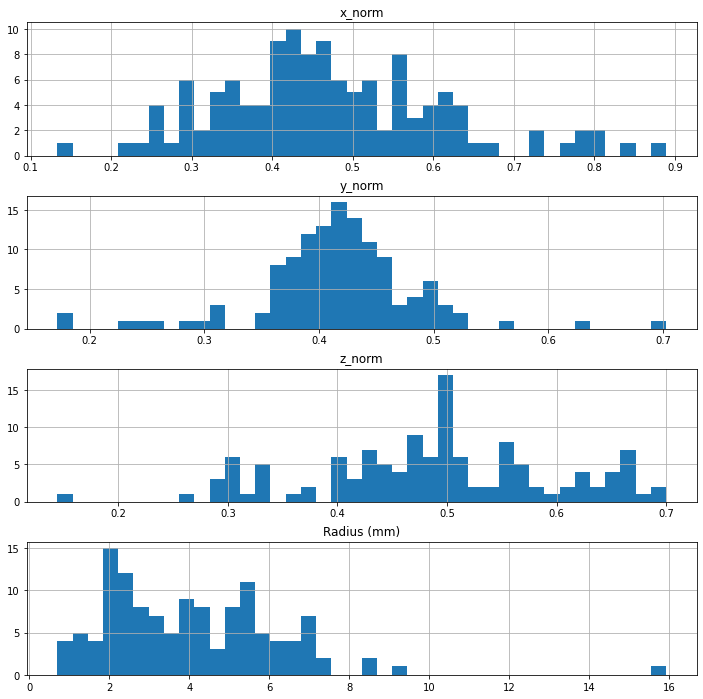

In [ ]:
aneurysms_location_hist = aneurysms_location_df.hist(column=['x_norm', 'y_norm', 'z_norm', 'Radius (mm)'],
                                                     bins=40,
                                                     figsize=(12, 12),
                                                     layout=(4, 1))

plt.savefig(drive_images_path / 'aneurysms_location_hist.png', dpi=300, bbox_inches='tight')

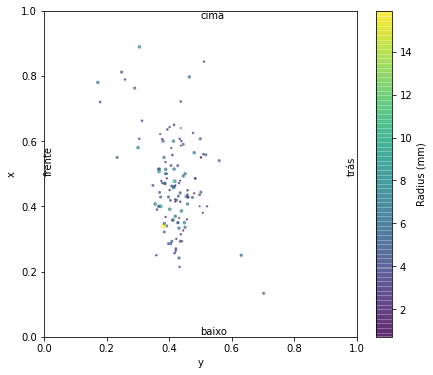

In [ ]:
plot = aneurysms_location_df.plot.scatter(x='y_norm', y='x_norm', c='Radius (mm)', colormap='viridis', s='Radius (mm)', alpha=0.6, figsize=(7, 6), sharex=False)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('y')
plt.ylabel('x')
if language == 'en':
    plt.text(0.5, 0, 'bottom', verticalalignment='bottom')
    plt.text(0.5, 1, 'top', verticalalignment='top')
    plt.text(0, 0.5, 'front', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'back', horizontalalignment='right', rotation='vertical')
elif language == 'pt':
    plt.text(0.5, 0, 'baixo', verticalalignment='bottom')
    plt.text(0.5, 1, 'cima', verticalalignment='top')
    plt.text(0, 0.5, 'frente', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'trás', horizontalalignment='right', rotation='vertical')

plt.savefig(drive_images_path / 'aneurysms_location_map_xy.png', dpi=300, bbox_inches='tight')

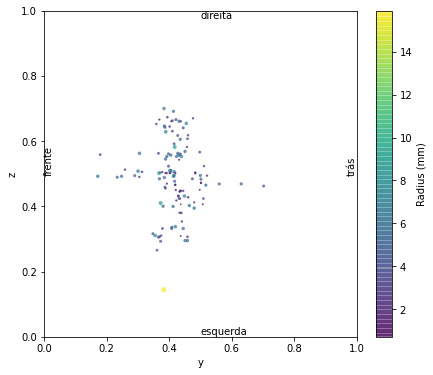

In [ ]:
aneurysms_location_df.plot.scatter(x='y_norm', y='z_norm', c='Radius (mm)', s='Radius (mm)', colormap='viridis', alpha=0.6, figsize=(7, 6), sharex=False)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('y')
plt.ylabel('z')
if language == 'en':
    plt.text(0, 0.5, 'front', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'back', horizontalalignment='right', rotation='vertical')
    plt.text(0.5, 0, 'bottom', verticalalignment='bottom')
    plt.text(0.5, 1, 'top', verticalalignment='top')
elif language == 'pt':
    plt.text(0, 0.5, 'frente', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'trás', horizontalalignment='right', rotation='vertical')
    plt.text(0.5, 0, 'esquerda', verticalalignment='bottom')
    plt.text(0.5, 1, 'direita', verticalalignment='top')

plt.savefig(drive_images_path / 'aneurysms_location_map_yz.png', dpi=300, bbox_inches='tight')

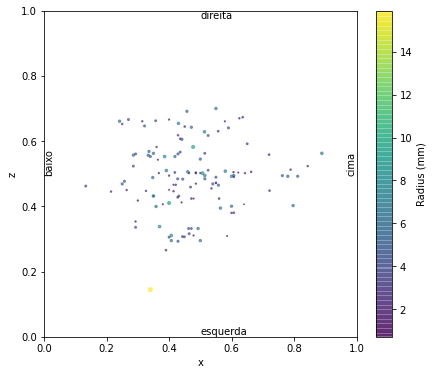

In [ ]:
aneurysms_location_df.plot.scatter(x='x_norm', y='z_norm', c='Radius (mm)', s='Radius (mm)', colormap='viridis', alpha=0.6, figsize=(7, 6), sharex=False)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('z')
if language == 'en':
    plt.text(0.5, 0, 'left', verticalalignment='bottom')
    plt.text(0.5, 1, 'right', verticalalignment='top')
    plt.text(0, 0.5, 'bottom', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'top', horizontalalignment='right', rotation='vertical')
elif language == 'pt':
    plt.text(0.5, 0, 'esquerda', verticalalignment='bottom')
    plt.text(0.5, 1, 'direita', verticalalignment='top')
    plt.text(0, 0.5, 'baixo', horizontalalignment='left', rotation='vertical')
    plt.text(1, 0.5, 'cima', horizontalalignment='right', rotation='vertical')

plt.savefig(drive_images_path / 'aneurysms_location_map_xz.png', dpi=300, bbox_inches='tight')

### TOF and Struct Aligned dimensions, intensities and spacing

In [ ]:
struct_aligned_min_dict = {}
struct_aligned_median_dict = {}
struct_aligned_max_dict = {}
struct_aligned_width_dict = {}
struct_aligned_height_dict = {}
struct_aligned_depth_dict = {}
struct_aligned_spacing_width_dict = {}
struct_aligned_spacing_height_dict = {}
struct_aligned_spacing_depth_dict = {}

for exam_path in dataset_path.glob('*'):

    struct_aligned_path = exam_path / 'pre' / struct_aligned_filename

    struct_aligned_itk = sitk.ReadImage(struct_aligned_path.absolute().as_posix(), imageIO='NiftiImageIO')
    struct_aligned_np = sitk.GetArrayViewFromImage(struct_aligned_itk)

    struct_aligned_size = np.array(struct_aligned_itk.GetSize(), dtype=np.uint16)
    struct_aligned_spacing = np.array(struct_aligned_itk.GetSpacing(), dtype=np.float32)

    struct_aligned_min_dict[exam_path.stem] = struct_aligned_np.min()
    struct_aligned_median_dict[exam_path.stem] = np.median(struct_aligned_np)
    struct_aligned_max_dict[exam_path.stem] = struct_aligned_np.max()
    
    struct_aligned_width_dict[exam_path.stem] = struct_aligned_size[0]
    struct_aligned_height_dict[exam_path.stem] = struct_aligned_size[1]
    struct_aligned_depth_dict[exam_path.stem] = struct_aligned_size[2]

    struct_aligned_spacing_width_dict[exam_path.stem] = struct_aligned_spacing[0]
    struct_aligned_spacing_height_dict[exam_path.stem] = struct_aligned_spacing[1]
    struct_aligned_spacing_depth_dict[exam_path.stem] = struct_aligned_spacing[2]

    del struct_aligned_np, struct_aligned_itk

In [ ]:
struct_aligned_min_series = pd.Series(struct_aligned_min_dict, dtype=np.float32)
struct_aligned_median_series = pd.Series(struct_aligned_median_dict, dtype=np.float32)
struct_aligned_max_series = pd.Series(struct_aligned_max_dict, dtype=np.float32)

struct_aligned_width_series = pd.Series(struct_aligned_width_dict, dtype=np.uint16)
struct_aligned_height_series = pd.Series(struct_aligned_height_dict, dtype=np.uint16)
struct_aligned_depth_series = pd.Series(struct_aligned_depth_dict, dtype=np.uint16)

struct_aligned_spacing_width_series = pd.Series(struct_aligned_spacing_width_dict, dtype=np.float32)
struct_aligned_spacing_height_series = pd.Series(struct_aligned_spacing_height_dict, dtype=np.float32)
struct_aligned_spacing_depth_series = pd.Series(struct_aligned_spacing_depth_dict, dtype=np.float32)

scan_params_df['struct_aligned_min'] = struct_aligned_min_series
scan_params_df['struct_aligned_median'] = struct_aligned_median_series
scan_params_df['struct_aligned_max'] = struct_aligned_max_series
scan_params_df['struct_aligned_width'] = struct_aligned_width_series
scan_params_df['struct_aligned_height'] = struct_aligned_height_series
scan_params_df['struct_aligned_depth'] = struct_aligned_depth_series
scan_params_df['struct_aligned_spacing_width'] = struct_aligned_spacing_width_series
scan_params_df['struct_aligned_spacing_height'] = struct_aligned_spacing_height_series
scan_params_df['struct_aligned_spacing_depth'] = struct_aligned_spacing_depth_series

In [ ]:
scan_params_df.head(10)

struct_Modality  ...  struct_aligned_depth
10035            FLAIR  ...                   140
10015            FLAIR  ...                   140
10030            FLAIR  ...                   100
10067F              T2  ...                   140
10036            FLAIR  ...                   140
10012            FLAIR  ...                    98
10075B           FLAIR  ...                   100
10045B           FLAIR  ...                   100
10007               T2  ...                   140
10020            FLAIR  ...                   160

[10 rows x 27 columns]

In [ ]:
scan_params_df.loc[:, ['TOF_min', 'TOF_median', 'TOF_max', 'struct_aligned_min',
                       'struct_aligned_median', 'struct_aligned_max']].describe()

TOF_min  TOF_median  ...  struct_aligned_median  struct_aligned_max
count    113.0  113.000000  ...             113.000000          113.000000
mean       0.0  118.295090  ...             264.566376         2255.885010
std        0.0  138.414627  ...             493.712769         1689.677002
min        0.0    3.041552  ...               2.000000          339.000000
25%        0.0   14.131426  ...              51.000000         1199.000000
50%        0.0   66.414215  ...              97.000000         2349.000000
75%        0.0  155.653351  ...             244.000000         2792.000000
max        0.0  620.654053  ...            3177.000000        13907.000000

[8 rows x 6 columns]

In [ ]:
scan_params_df.loc[:, ['TOF_width', 'TOF_height', 'TOF_depth', 'struct_aligned_width', 
                       'struct_aligned_height', 'struct_aligned_depth']].describe()

TOF_width   TOF_height  ...  struct_aligned_height  struct_aligned_depth
count   113.000000   113.000000  ...             113.000000            113.000000
mean    556.884956   556.884956  ...             556.884956            131.902655
std     140.998211   140.998211  ...             140.998211             21.231700
min     256.000000   256.000000  ...             256.000000             64.000000
25%     512.000000   512.000000  ...             512.000000            138.000000
50%     512.000000   512.000000  ...             512.000000            140.000000
75%     560.000000   560.000000  ...             560.000000            140.000000
max    1024.000000  1024.000000  ...            1024.000000            180.000000

[8 rows x 6 columns]

In [ ]:
scan_params_df.loc[:, ['TOF_spacing_width', 'TOF_spacing_height', 'TOF_spacing_depth', 'struct_aligned_spacing_width',
                       'struct_aligned_spacing_height', 'struct_aligned_spacing_depth']].describe()

TOF_spacing_width  ...  struct_aligned_spacing_depth
count         113.000000  ...                    113.000000
mean            0.352362  ...                      0.544688
std             0.056936  ...                      0.092424
min             0.195312  ...                      0.400000
25%             0.312500  ...                      0.499999
50%             0.357143  ...                      0.500000
75%             0.390625  ...                      0.550000
max             0.585938  ...                      1.000000

[8 rows x 6 columns]

**Do the struct aligned and the TOF-MRA exams have the same shape?**

In [ ]:
(
    (scan_params_df['TOF_width'] == scan_params_df['struct_aligned_width']) &
    (scan_params_df['TOF_height'] == scan_params_df['struct_aligned_height']) &
    (scan_params_df['TOF_depth'] == scan_params_df['struct_aligned_depth'])
).all()

True

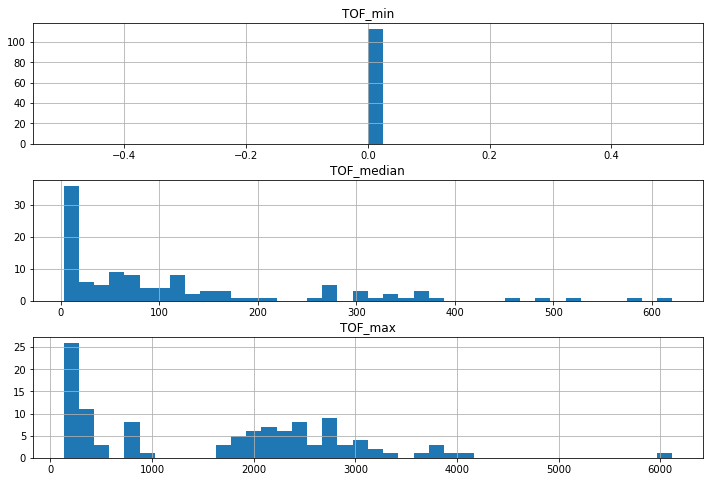

In [ ]:
scan_params_tof_hist = scan_params_df.hist(column=['TOF_min', 'TOF_median', 'TOF_max'],
                                           bins=40,
                                           figsize=(12, 8),
                                           layout=(3, 1))

plt.savefig(drive_images_path / 'scan_params_tof_hist.png', dpi=300, bbox_inches='tight')

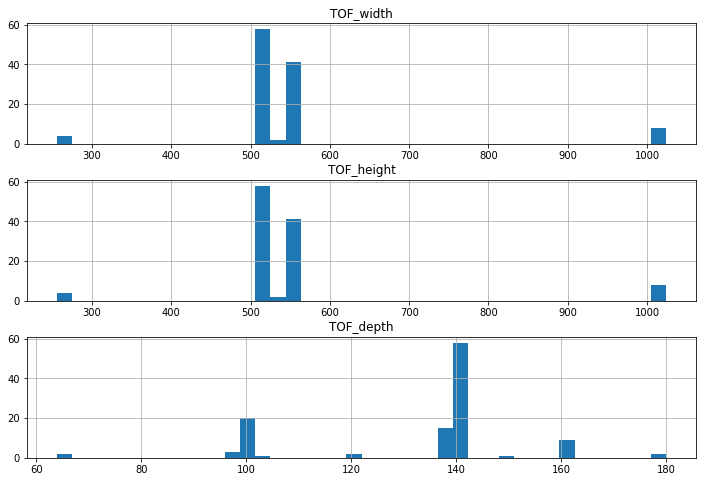

In [ ]:
scan_params_tof_shape_hist = scan_params_df.hist(column=['TOF_width', 'TOF_height', 'TOF_depth'],
                                                 bins=40,
                                                 figsize=(12, 8),
                                                 layout=(3, 1))

plt.savefig(drive_images_path / 'scan_params_tof_shape_hist.png', dpi=300, bbox_inches='tight')

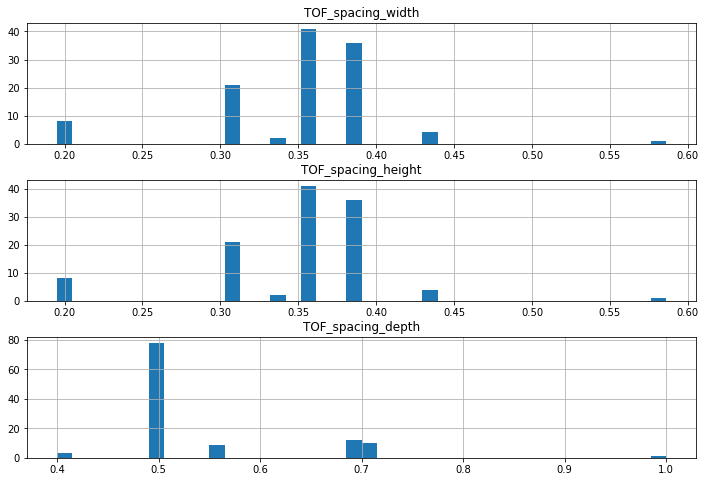

In [ ]:
scan_params_tof_spacing_hist = scan_params_df.hist(column=['TOF_spacing_width', 'TOF_spacing_height', 'TOF_spacing_depth'],
                                                 bins=40,
                                                 figsize=(12, 8),
                                                 layout=(3, 1))

plt.savefig(drive_images_path / 'scan_params_tof_spacing_hist.png', dpi=300, bbox_inches='tight')

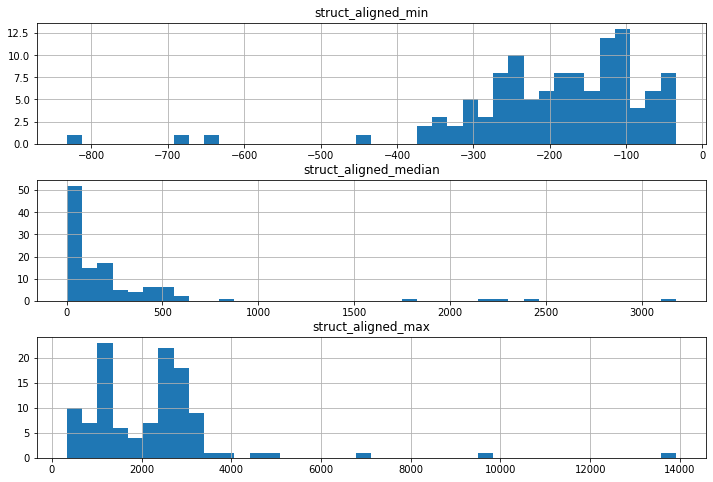

In [ ]:
scan_params_struct_aligned_hist = scan_params_df.hist(column=['struct_aligned_min',
                                                              'struct_aligned_median',
                                                              'struct_aligned_max'],
                                                      bins=40,
                                                      figsize=(12, 8),
                                                      layout=(3, 1))

plt.savefig(drive_images_path / 'scan_params_struct_aligned_hist.png', dpi=300, bbox_inches='tight')

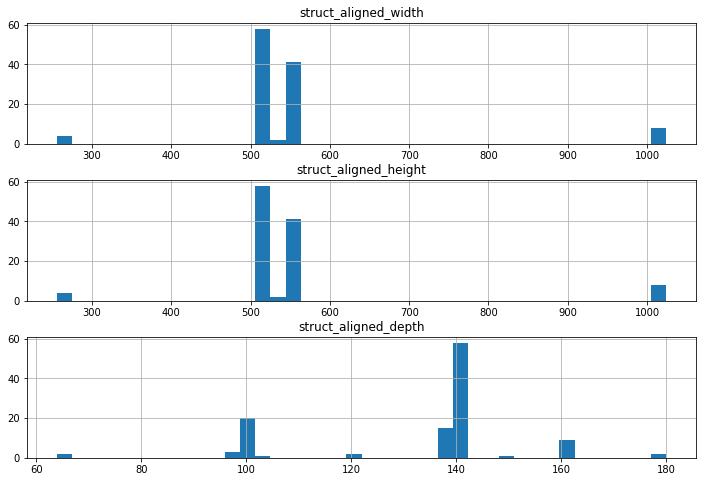

In [ ]:
scan_params_struct_aligned_shape_hist = scan_params_df.hist(column=['struct_aligned_width',
                                                              'struct_aligned_height',
                                                              'struct_aligned_depth'],
                                                      bins=40,
                                                      figsize=(12, 8),
                                                      layout=(3, 1))

plt.savefig(drive_images_path / 'scan_params_struct_aligned_shape_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

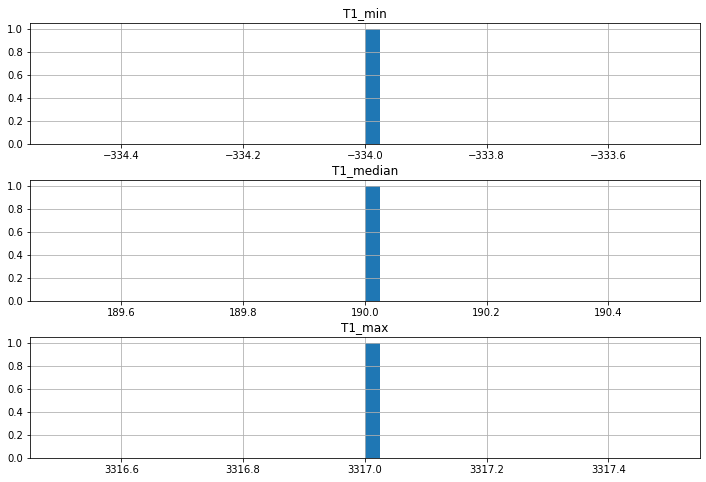

In [ ]:
scan_params_t1_hist = scan_params_df[scan_params_df['struct_Modality'] == 'T1'].hist(
    column=['struct_aligned_min', 'struct_aligned_median', 'struct_aligned_max'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('T1_min')
plt.subplot(312)
plt.title('T1_median')
plt.subplot(313)
plt.title('T1_max')

plt.savefig(drive_images_path / 'scan_params_t1_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

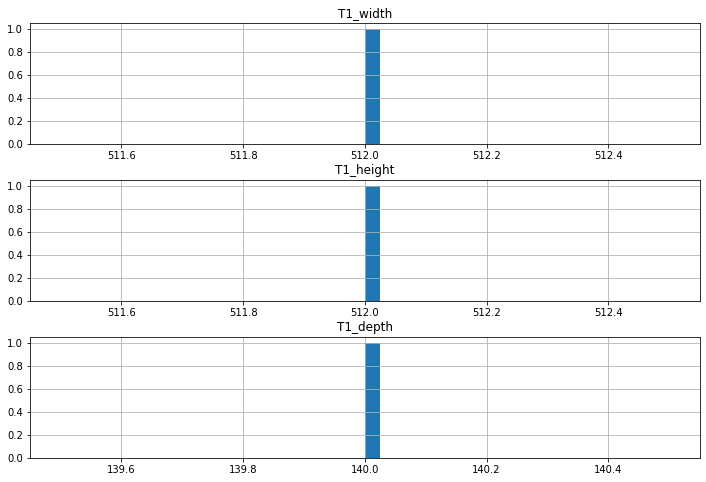

In [ ]:
scan_params_t1_shape_hist = scan_params_df[scan_params_df['struct_Modality'] == 'T1'].hist(
    column=['struct_aligned_width', 'struct_aligned_height', 'struct_aligned_depth'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('T1_width')
plt.subplot(312)
plt.title('T1_height')
plt.subplot(313)
plt.title('T1_depth')

plt.savefig(drive_images_path / 'scan_params_t1_shape_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

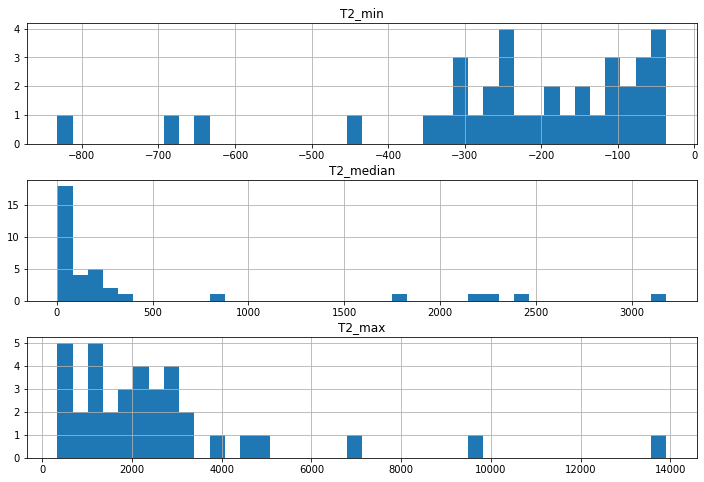

In [ ]:
scan_params_t2_hist = scan_params_df[scan_params_df['struct_Modality'] == 'T2'].hist(
    column=['struct_aligned_min', 'struct_aligned_median', 'struct_aligned_max'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('T2_min')
plt.subplot(312)
plt.title('T2_median')
plt.subplot(313)
plt.title('T2_max')

plt.savefig(drive_images_path / 'scan_params_t2_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

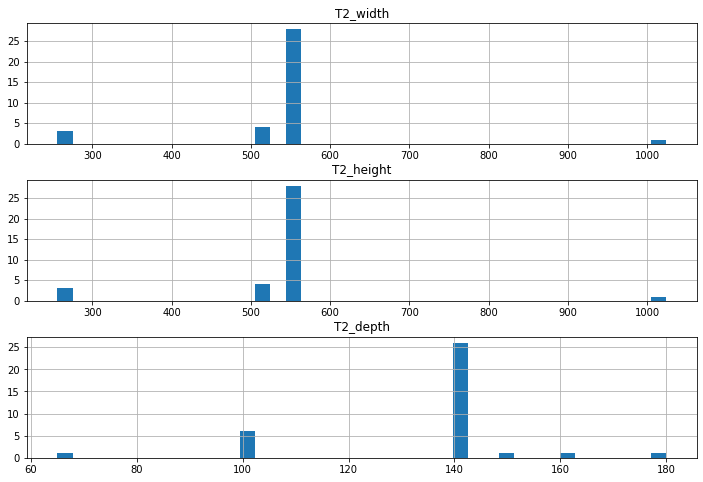

In [ ]:
scan_params_t2_shape_hist = scan_params_df[scan_params_df['struct_Modality'] == 'T2'].hist(
    column=['struct_aligned_width', 'struct_aligned_height', 'struct_aligned_depth'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('T2_width')
plt.subplot(312)
plt.title('T2_height')
plt.subplot(313)
plt.title('T2_depth')

plt.savefig(drive_images_path / 'scan_params_t2_shape_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

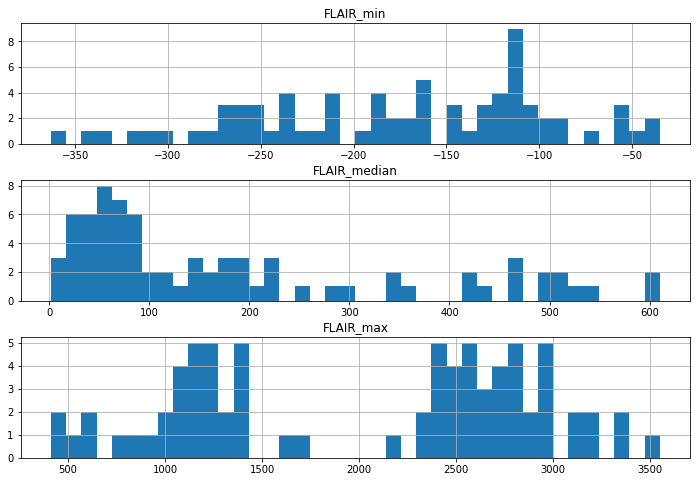

In [ ]:
scan_params_flair_hist = scan_params_df[scan_params_df['struct_Modality'] == 'FLAIR'].hist(
    column=['struct_aligned_min', 'struct_aligned_median', 'struct_aligned_max'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('FLAIR_min')
plt.subplot(312)
plt.title('FLAIR_median')
plt.subplot(313)
plt.title('FLAIR_max')

plt.savefig(drive_images_path / 'scan_params_flair_hist.png', dpi=300, bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

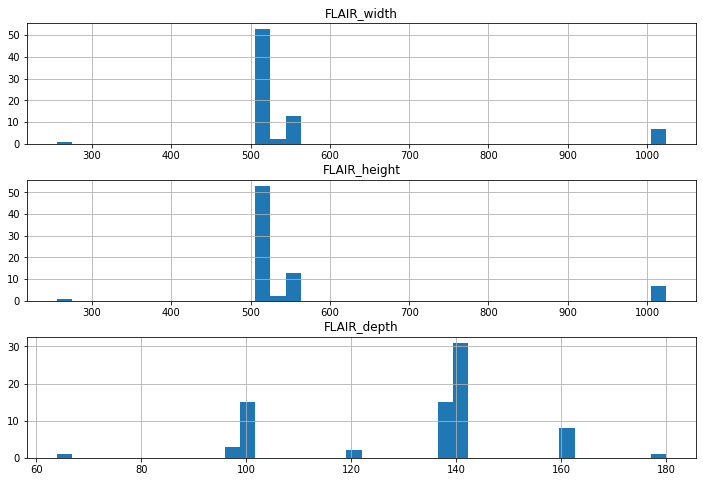

In [ ]:
scan_params_flair_shape_hist = scan_params_df[scan_params_df['struct_Modality'] == 'FLAIR'].hist(
    column=['struct_aligned_width', 'struct_aligned_height', 'struct_aligned_depth'],
    bins=40,
    figsize=(12, 8),
    layout=(3, 1))

plt.subplot(311)
plt.title('FLAIR_width')
plt.subplot(312)
plt.title('FLAIR_height')
plt.subplot(313)
plt.title('FLAIR_depth')

plt.savefig(drive_images_path / 'scan_params_flair_shape_hist.png', dpi=300, bbox_inches='tight')

We see that the shape of the exams are not homogenuous, however most have shape close to (512, 512, 140). There are some rare cases with width and height bigger than 1000.

The best approach seams to resize all input exams with a spacing equal to the media spacing before passing to the deep learning model so that the algorthm treats all aneurysms of the inputs with the same spacing and resize the result before calculating the loss and the metrics.

### Struct Aligned Comparison: T1 vs T2 vs FLAIR

In [ ]:
t1_exam_path = dataset_path / '10067B'
t2_exam_path = dataset_path / '10033'
flair_exam_path = dataset_path / '10057F'

In [ ]:
def plot_struct_aligned_1_ann(exam_path, modality='Structure'):
    
    with open(exam_path / location_filename, 'r') as f:
        f_parts = f.readlines()

    if len(f_parts) == 0:
        raise IndexError('No aneurysm found')
    
    aneurysm_location = tuple(f_parts[0].split(', '))

    if len(aneurysm_location) != 4:
        raise IndexError('No aneurysm found')

    aneurysm_location = int(aneurysm_location[2]), int(aneurysm_location[1]), int(aneurysm_location[0]), float(aneurysm_location[3])

    print(aneurysm_location)

    struct_aligned_itk = sitk.ReadImage((exam_path / 'pre' / struct_aligned_filename).absolute().as_posix(), imageIO='NiftiImageIO')
    struct_aligned_np = sitk.GetArrayViewFromImage(struct_aligned_itk)

    # struct_aligned_np = nib.load(exam_path / 'pre' / struct_aligned_filename).get_fdata()

    print(f"struct_aligned_np shape {struct_aligned_np.shape} type {struct_aligned_np.dtype}")

    struct_aligned_min, struct_aligned_max = struct_aligned_np.min(), struct_aligned_np.max()

    fig = plt.figure(figsize=(15, 20))

    plt.subplot(2,2,1)
    plt.imshow(struct_aligned_np[aneurysm_location[0], :, :], vmin=struct_aligned_min, vmax=struct_aligned_max)
    plt.scatter(aneurysm_location[2], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
    if language == 'en':
        plt.title(f'{modality} aligned with TOF MRA {exam_path.name} slice x={aneurysm_location[0]}', pad=20)
    elif language == 'pt':
        plt.title(f'{modality} alinhado com TOF MRA {exam_path.name} seção x={aneurysm_location[0]}', pad=20)
    plt.xlabel('z')
    plt.ylabel('y')

    plt.subplot(4,2,5)
    plt.imshow(struct_aligned_np[:, aneurysm_location[1], :], vmin=struct_aligned_min, vmax=struct_aligned_max)
    plt.scatter(aneurysm_location[2], aneurysm_location[0], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
    if language == 'en':
        plt.title(f'{modality} aligned with TOF MRA {exam_path.name} slice y={aneurysm_location[1]}', pad=20)
    elif language == 'pt':
        plt.title(f'{modality} alinhado com TOF MRA {exam_path.name} seção y={aneurysm_location[1]}', pad=20)
    plt.xlabel('z')
    plt.ylabel('x')

    plt.subplot(2,6,5)
    plt.imshow(np.transpose(struct_aligned_np[:, :, aneurysm_location[2]]), vmin=struct_aligned_min, vmax=struct_aligned_max)
    plt.scatter(aneurysm_location[0], aneurysm_location[1], s=aneurysm_location[3]*100, marker='o', facecolors='none', edgecolors='r')
    if language == 'en':
        plt.title(f'{modality} aligned with TOF MRA {exam_path.name} slice z={aneurysm_location[2]}', pad=20)
    elif language == 'pt':
        plt.title(f'{modality} alinhado com TOF MRA {exam_path.name} seção z={aneurysm_location[2]}', pad=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()

    plt.savefig(drive_images_path / (exam_path.stem + '_annotated_' + modality + '.png'), dpi=300, bbox_inches='tight')

(66, 194, 170, 3.3)
struct_aligned_np shape (140, 512, 512) type float32


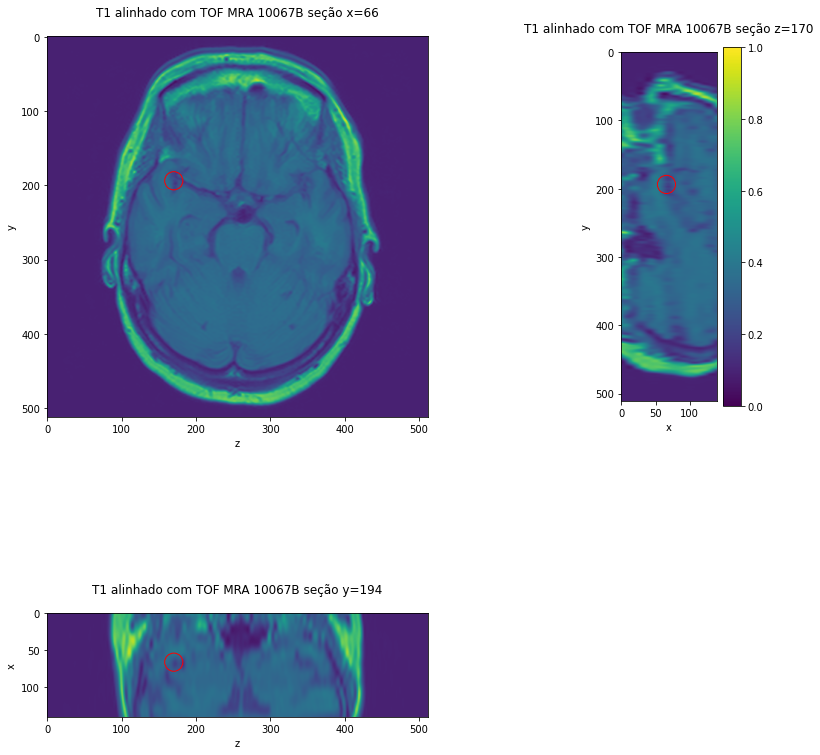

In [ ]:
plot_struct_aligned_1_ann(t1_exam_path, 'T1')

(40, 223, 293, 4.14)
struct_aligned_np shape (140, 560, 560) type float32


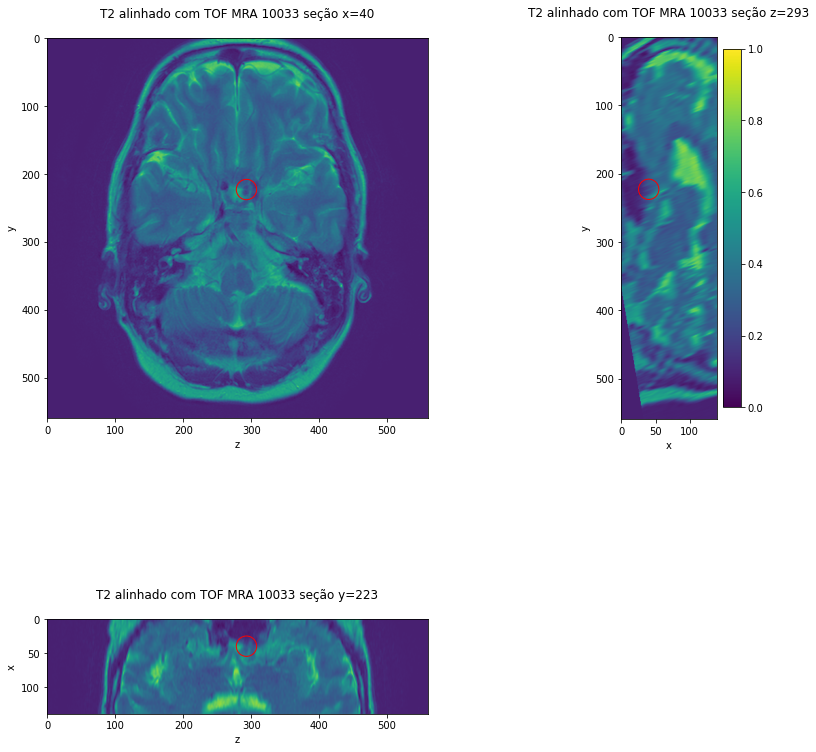

In [ ]:
plot_struct_aligned_1_ann(t2_exam_path, 'T2')

(72, 233, 277, 6.55)
struct_aligned_np shape (140, 560, 560) type float32


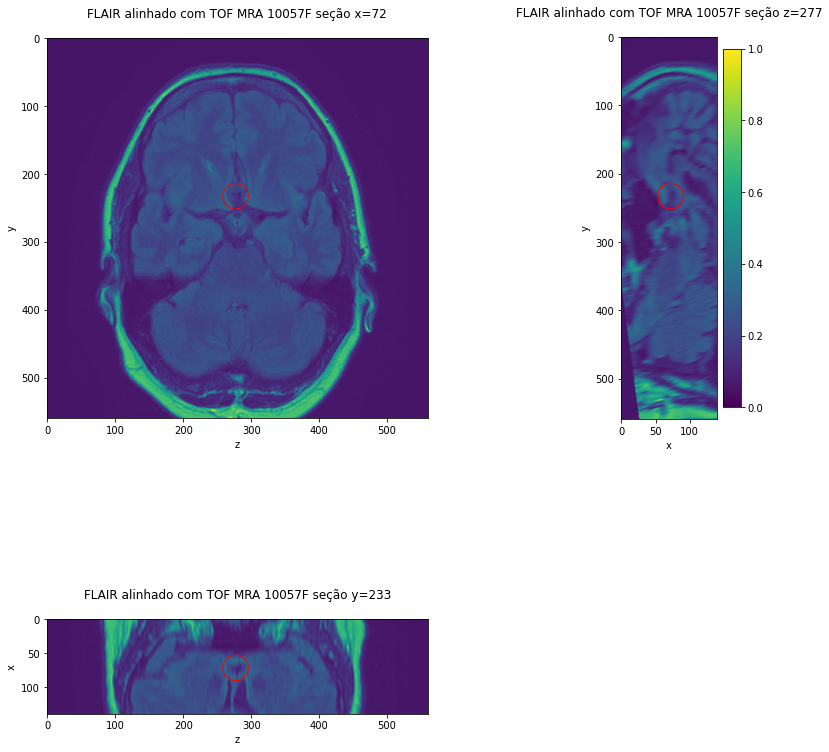

In [ ]:
plot_struct_aligned_1_ann(flair_exam_path, 'FLAIR')

For TOF-MRA images the aneurysm is caracterized by regions with high values, while for structure aligned images T1, T2 and FLAIR the aneurysm is caracterized by regions with low values.

We see that the values of voxels in the TOF and struct aligned vary a lot and may have some outliers. So a z-score normalization should be performed before using the segmentation model.

# Training

## Settings

In [ ]:
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, MaxPool3D, BatchNormalization, LayerNormalization, Concatenate
from tensorflow.keras.activations import relu, softmax

In [ ]:
MAX_EXAM_SHAPE = (512, 512, 256)
SRC_EXAM_SHAPE = (96, 96, 96)
EXAM_SHAPE = (SRC_EXAM_SHAPE[0], SRC_EXAM_SHAPE[1], SRC_EXAM_SHAPE[2], 1)
MASK_SHAPE = (SRC_EXAM_SHAPE[0], SRC_EXAM_SHAPE[1], SRC_EXAM_SHAPE[2], 3)
EXAM_TYPE = tf.float32
BATCH_SIZE = 1
NUM_EPOCHS = 30
SHUFFLE_BUFFER_SIZE = 4
NUM_CLASSES = 3
CLASS_WEIGHTS = (0.005, 10.0, 10.0)

In [ ]:
NUM_EXAMS = sum(1 for exam_path in dataset_path.glob('*'))

TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.1
TEST_SPLIT = 0.2

NUM_TRAIN = round(NUM_EXAMS * TRAIN_SPLIT / (TRAIN_SPLIT + VAL_SPLIT + TEST_SPLIT))
NUM_TEST = round(NUM_EXAMS * TEST_SPLIT / (TRAIN_SPLIT + VAL_SPLIT + TEST_SPLIT))
NUM_VAL = NUM_EXAMS -  round(NUM_EXAMS - NUM_TRAIN - NUM_TEST)

## Data augmentation

In [ ]:
def resize_3d_image(image, output_size, order=1):
    """
    Resize 3d image
    
    Parameters
    ----------
    image  : image with 4 (width, height, depth, channels) or
            5 (batch, width, height, depth, channels) dimensions
            np.ndarray
    size   : new size
             (width, height, depth)
             tuple with 3 integers
    order  : order of interpolation
             integer 0-5

    Returns
    -------
    new_image : image with 4 or 5 dimensions and the size required
                nd.ndarray
    """

    if image.ndim == 4:
        output_shape = output_size
    elif image.ndim == 5:
        if image.shape[0] is None:
            batch_dim = BATCH_SIZE
        else:
            batch_dim = image.shape[0]

        output_shape = (batch_dim,
                        output_size[0],
                        output_size[1],
                        output_size[2],
                        image.shape[3])
    else:
        raise ValueError("image should have 4 or 5 dimensions")

    new_image = skimage.transform.resize(image, output_shape, order=order)

    return new_image

In [ ]:
def tf_resize_3d_image(image, size, order=1):
    """
    Resize 3d image
    
    Parameters
    ----------
    image  : image with 4 (width, height, depth, channels) or
            5 (batch, width, height, depth, channels) dimensions
            tf.Tensor
    size   : new size
             (width, height, depth)
             tuple with 3 integers
    order  : order of interpolation
             integer 0-5

    Returns
    -------
    new_image : image with 4 or 5 dimensions and the size required
                tf.Tensor
    """

    new_image = tf.py_function(resize_3d_image, [image, output_size, order], image.dtype)

    return new_image

In [ ]:
def tf_resize_3d_image(image, size, method='bilinear', batch=True):
    """
    Resize batch 3d image without the channel dimension
    
    Parameters
    ----------
    image  : image with 4 dimensions (width, height, depth)
             tf.Tensor or np.ndarray
    size   : new size (width, height, depth)
             tuple with length 3
    method : interpolation method
             string

    Returns
    -------
    new_image : image with 4 dimensions and the size required
                tf.Tensor
    """

    new_image = tf.image.resize(image, (size[0], size[1]), method=method)

    new_image = tf.cond(batch, lambda: tf.transpose(new_image, perm=[0, 1, 3, 2]),
                        lambda: tf.transpose(new_image, perm=[0, 2, 1]))
     
    new_image = tf.image.resize(new_image, (size[0], size[2]), method=method)

    new_image = tf.cond(batch, lambda: tf.transpose(new_image, perm=[0, 1, 3, 2]),
                        lambda: tf.transpose(new_image, perm=[0, 2, 1]))

    return new_image

In [ ]:
def tf_rotate_3d_image(image, angle, method='bilinear'):
    """
    Rotate 3d image
    
    Parameters
    ----------
    image  : image with 4 dimensions
             tf.Tensor or np.ndarray
    angle  : rotation angles
             sequence with 3 floats
    method : interpolation method
             string

    Returns
    -------
    new_image : image with 4 dimensions and the size required
                tf.Tensor
    """

    new_image = tfa.image.rotate(image, angle[0])

    new_image = tf.transpose(new_image, perm=[1, 0, 2, 3])
    new_image = tfa.image.rotate(new_image, angle[1], method=method)
    new_image = tf.transpose(new_image, perm=[1, 0, 2, 3])

    new_image = tf.transpose(new_image, perm=[2, 0, 1, 3])
    new_image = tfa.image.rotate(new_image, angle[2], method=method)
    new_image = tf.transpose(new_image, perm=[1, 2, 0, 3])

    return new_image

## Custom Metrics

In [ ]:
class FalsePositivesAneurysms(tf.keras.metrics.Metric):
    """
    Metric that counts the average number of voxels wrongly classified as untreated and 
    unruptured aneurysms in a dataset
    """
    def __init__(self, name='false_positives_aneurysms', **kwargs):
        super(FalsePositivesAneurysms, self).__init__(name=name, **kwargs)
        self.false_positives_aneurysms = self.add_weight(name="fpa", initializer="zeros")
        self.num_batchs = tf.Variable(0.0)

    def update_state(self, y_true, y_pred, sample_weight=None):
        false_positives_bool = ((tf.math.argmax(y_pred, axis=-1) == 1) & (tf.math.argmax(y_true, axis=-1) != 1))
        false_positives =  tf.reduce_sum(tf.cast(false_positives_bool, tf.int32))
        false_positives = false_positives / tf.shape(y_pred)[0]
        false_positives = tf.cast(false_positives, tf.float32)

        total_false_positives = self.false_positives_aneurysms * self.num_batchs + false_positives

        self.num_batchs.assign_add(1.0)
        self.false_positives_aneurysms.assign(total_false_positives / self.num_batchs)

    def result(self):
        return self.false_positives_aneurysms

    def reset_state(self):
        self.false_positives_aneurysms.assign(0.0)
        self.num_batchs.assign(0.0)

In [ ]:
class SensitivityAneurysms(tf.keras.metrics.Metric):
    """
    Metric that counts the average sensitivity of an algorithm, the ratio between the 
    number of correctly classified voxels as untreated and unruptured aneurysms
    and the number of voxels annotated as untreated and unruptured aneurysms in a
    dataset
    """
    def __init__(self, name='sensitivity_aneurysms', **kwargs):
        super(SensitivityAneurysms, self).__init__(name=name, **kwargs)
        self.true_pred_aneurysms = self.add_weight(name="tpa", initializer="zeros")
        self.true_aneurysms = self.add_weight(name="ta", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_pred_aneurysms_bool = ((tf.math.argmax(y_pred, axis=-1) == 1) & (tf.math.argmax(y_true, axis=-1) == 1))
        true_aneurysms_bool = (tf.math.argmax(y_true, axis=-1) == 1)

        true_pred_aneurysms = tf.reduce_sum(tf.cast(true_pred_aneurysms_bool, tf.float32))
        true_aneurysms = tf.reduce_sum(tf.cast(true_aneurysms_bool, tf.float32))

        self.true_pred_aneurysms.assign_add(true_pred_aneurysms)
        self.true_aneurysms.assign_add(true_aneurysms)

    def result(self):
        return self.true_pred_aneurysms / (self.true_aneurysms + tf.keras.backend.epsilon())

    def reset_state(self):
        self.true_pred_aneurysms.assign(0.0)
        self.true_aneurysms.assign(0.0)

In [ ]:
class DiceAneurysms(tf.keras.metrics.Metric):
    """
    Metric that calculates the Sorenson-Dice similarity coefficient (DSC).
    """
    def __init__(self, name='dice', **kwargs):
        super(DiceAneurysms, self).__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        pass

    def result(self):
        return 0.0

    def reset_state(self):
        pass

In [ ]:
class VolumetricSimilarity(tf.keras.metrics.Metric):
    """
    Metric that calculates the volumetric similarity between a predicted and the
    true mask.
    """
    def __init__(self, name='volumetric_similarity', **kwargs):
        super(VolumetricSimilarity, self).__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        pass

    def result(self):
        return 0.0

    def reset_state(self):
        pass

In [ ]:
class HausdorffDistance95(tf.keras.metrics.Metric):
    """
    Metric that calculates the Hausdorff distance between a predicted and the
    true mask considering the 95th highest distance instead of the highest distance.
    """
    def __init__(self, name='haussdorff_xistance_95', **kwargs):
        super(HausdorffDistance95, self).__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        pass

    def result(self):
        return 0.0

    def reset_state(self):
        pass

## Custom Losses

In [ ]:
class WeightedAneurysmsCategoricalCrossentropy(tf.keras.losses.Loss):
    """
    Loss function that calculates the categorical cross-entropy between a predicted
    and the true values of a 3D mask containing voxels classified as 0 (normal),
    1 (untreated unruptured aneurysms) and 2 (treated aneurysms) 
    """
    def __init__(self, class_weight, name="weighted_categorical_crossentropy"):
        super().__init__(name=name)
        self.class_weight = tf.constant(class_weight, dtype=EXAM_TYPE)

    def call(self, y_true, y_pred):
        y_pred = y_pred / tf.math.reduce_sum(y_pred, axis=-1, keepdims=True)
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        loss = - y_true * tf.math.log(y_pred)# * self.class_weight
        loss = tf.math.reduce_sum(loss, axis=-1)
        return loss

## Model

In [ ]:
def preprocess(exam_input):
    
    x = tf_resize_3d_image(exam_input, EXAM_SHAPE)
    
    exam_preprocessed = LayerNormalization()(x)

    return exam_preprocessed

In [ ]:
def posprocess(aneurysm_mask, output_shape):

    x0 = tf_resize_3d_image(aneurysm_mask[..., 0], output_shape)
    x1 = tf_resize_3d_image(aneurysm_mask[..., 1], output_shape)
    x2 = tf_resize_3d_image(aneurysm_mask[..., 2], output_shape)

    aneurysm_mask_processed = tf.stack([x0, x1, x2], -1)
    #aneurysm_mask_processed = aneurysm_mask
    
    return aneurysm_mask_processed

In [ ]:
def segmentation_model(x0):
    
    x = Conv3D(32, (3, 3, 3), padding='same')(x0)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(64, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x1 = relu(x)

    x = MaxPool3D((2, 2, 2), (2, 2, 2), padding='same')(x1)

    x = Conv3D(64, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(128, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x2 = relu(x)

    x = MaxPool3D((2, 2, 2), (2, 2, 2), padding='same')(x2)

    x = Conv3D(128, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(256, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x3 = relu(x)

    x = MaxPool3D((2, 2, 2), (2, 2, 2), padding='same')(x3)

    x = Conv3D(256, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(512, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3DTranspose(512, (2, 2, 2), (2, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Concatenate()([x, x3])

    x = Conv3D(256, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(256, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3DTranspose(256, (2, 2, 2), (2, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Concatenate()([x, x2])

    x = Conv3D(128, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(128, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3DTranspose(128, (2, 2, 2), (2, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Concatenate()([x, x1])

    x = Conv3D(64, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Conv3D(64, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = relu(x)

    x = Concatenate()([x, x0])

    x = Conv3D(NUM_CLASSES, (1, 1, 1), padding='same')(x)

    aneurysm_mask_output = softmax(x, axis=-1)

    return aneurysm_mask_output

In [ ]:
def get_model():

    tof_input = tf.keras.Input(shape=(None, None, None), dtype=EXAM_TYPE, name='tof_input')
    struct_aligned_input = tf.keras.Input(shape=(None, None, None), dtype=EXAM_TYPE, name='struct_aligned_input')

    mask_shape = tf.shape(tof_input)

    tof_norm = preprocess(tof_input)
    struct_aligned_norm = preprocess(struct_aligned_input)

    x0 = tf.stack([tof_norm, struct_aligned_norm], -1)

    aneurysm_mask = segmentation_model(x0)

    aneurysm_mask_output = posprocess(aneurysm_mask, mask_shape)

    return tf.keras.Model(
        inputs=[tof_input, struct_aligned_input],
        outputs=aneurysm_mask_output)

In [ ]:
model = get_model()

In [ ]:
tf.keras.utils.plot_model(model, drive_images_path / 'aneurysms_segmentation_model.png', show_shapes=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=WeightedAneurysmsCategoricalCrossentropy(CLASS_WEIGHTS),
    metrics=[
             tf.keras.metrics.CategoricalAccuracy(),
             FalsePositivesAneurysms(),
             SensitivityAneurysms()
             ]
)

## Dataset Generation

In [ ]:
class AneurysmSegmentationDatasetTOF(tf.data.Dataset):

    def _generator():

        for exam_path in dataset_path.glob('*'):
            tof_path = exam_path / 'pre' / tof_filename
            struct_aligned_path = exam_path / 'pre' / struct_aligned_filename
            aneurysms_mask_path = exam_path / aneurysms_filename
            
            # load data
            tof_data = nib.load(tof_path).get_fdata()
            struct_aligned_data = nib.load(struct_aligned_path).get_fdata()
            aneurysms_mask_data = nib.load(aneurysms_mask_path).get_fdata()

            # cast mask as int
            aneurysms_mask_data = tf.cast(aneurysms_mask_data, tf.uint8)

            # cast exam as EXAM_TYPE
            tof_data = tf.cast(tof_data, EXAM_TYPE)
            struct_aligned_data = tf.cast(struct_aligned_data, EXAM_TYPE)

            # stack exams TOF-MRA with T1, T2 or FLAIR
            tof_data = tf.expand_dims(tof_data, axis=-1)
            struct_aligned_data = tf.expand_dims(struct_aligned_data, axis=-1)

            # encode mask as one-hot
            aneurysms_mask_one_hot_data = tf.one_hot(aneurysms_mask_data, 3)

            # cast mask as float
            aneurysms_mask_one_hot_data = tf.cast(aneurysms_mask_one_hot_data, EXAM_TYPE)

            # resize mask and exam
            tof_data = tf_resize_3d_image(tof_data, EXAM_SHAPE)
            struct_aligned_data = tf_resize_3d_image(struct_aligned_data, EXAM_SHAPE)
            aneurysms_mask_one_hot_data = tf_resize_3d_image(aneurysms_mask_one_hot_data, MASK_SHAPE)

            yield (tof_data, struct_aligned_data), aneurysms_mask_one_hot_data

    def __new__(cls):

        return cls.from_generator(cls._generator,
                                  output_signature=(
                                      (tf.TensorSpec(shape=EXAM_SHAPE, dtype=EXAM_TYPE, name='tof_input'),
                                       tf.TensorSpec(shape=EXAM_SHAPE, dtype=EXAM_TYPE, name='struct_aligned_input')),
                                      tf.TensorSpec(shape=MASK_SHAPE, dtype=EXAM_TYPE, name='aneurysm_mask_output'),
                                      )
                                  )
            

In [ ]:
class AneurysmSegmentationDatasetTOF(tf.data.Dataset):

    def _generator():

        for exam_path in dataset_path.glob('*'):
            tof_path = exam_path / 'pre' / tof_filename
            struct_aligned_path = exam_path / 'pre' / struct_aligned_filename
            aneurysms_mask_path = exam_path / aneurysms_filename
            
            # load data
            tof_data = nib.load(tof_path).get_fdata()
            struct_aligned_data = nib.load(struct_aligned_path).get_fdata()
            aneurysms_mask_data = nib.load(aneurysms_mask_path).get_fdata()

            # cast exam as EXAM_TYPE
            tof_data = tf.cast(tof_data, EXAM_TYPE)
            struct_aligned_data = tf.cast(struct_aligned_data, EXAM_TYPE)

            # cast mask as int
            aneurysms_mask_data = tf.cast(aneurysms_mask_data, tf.uint8)

            # resize if 3d image is too large
            tof_data = tf.cond(tf.math.reduce_any(tf.shape(tof_data) > tf.constant(MAX_EXAM_SHAPE)),
                               lambda: tf_resize_3d_image(tof_data, MAX_EXAM_SHAPE, batch=False),
                               lambda: tof_data)
            struct_aligned_data = tf.cond(tf.math.reduce_any(tf.shape(struct_aligned_data) > tf.constant(MAX_EXAM_SHAPE)),
                                          lambda: tf_resize_3d_image(struct_aligned_data, MAX_EXAM_SHAPE, batch=False),
                                          lambda: struct_aligned_data)
            aneurysms_mask_data = tf.cond(tf.math.reduce_any(tf.shape(aneurysms_mask_data) > tf.constant(MAX_EXAM_SHAPE)),
                               lambda: tf_resize_3d_image(aneurysms_mask_data, MAX_EXAM_SHAPE, method='nearest', batch=False),
                               lambda: aneurysms_mask_data)

            # encode mask as one-hot
            aneurysms_mask_one_hot_data = tf.one_hot(aneurysms_mask_data, 3)

            # cast mask as float
            aneurysms_mask_one_hot_data = tf.cast(aneurysms_mask_one_hot_data, EXAM_TYPE)

            yield (tof_data, struct_aligned_data), aneurysms_mask_one_hot_data

    def __new__(cls):

        return cls.from_generator(cls._generator,
                                  output_signature=(
                                      (tf.TensorSpec(shape=(None, None, None), dtype=EXAM_TYPE, name='tof_input'),
                                       tf.TensorSpec(shape=(None, None, None), dtype=EXAM_TYPE, name='struct_aligned_input')),
                                      tf.TensorSpec(shape=(None, None, None, 3), dtype=EXAM_TYPE, name='aneurysm_mask_output'),
                                      )
                                  )

In [ ]:
def benchmark(dataset, num_epochs=1):
    """
    Parameters
    ----------
    dataset    : dataset
                 tf.data.Dataset
    num_epochs : number of epochs
                 int
    """
    start = time.perf_counter()
    for epoch in range(num_epochs):
        for data in dataset:
            pass
    print(f"Execution time: {(time.perf_counter() - start) / num_epochs} s/epoch")

In [ ]:
#benchmark(AneurysmSegmentationDatasetTOF().take(20).batch(BATCH_SIZE))

In [ ]:
#benchmark(AneurysmSegmentationDatasetTOF().take(20).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

In [ ]:
dataset = AneurysmSegmentationDatasetTOF()

dataset = dataset.shuffle(100, reshuffle_each_iteration=False)

train_dataset = dataset.take(NUM_TRAIN)
val_dataset = dataset.skip(NUM_TRAIN).take(NUM_VAL)
test_dataset = dataset.skip(NUM_TRAIN).skip(NUM_VAL).take(NUM_TEST)

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)#.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Training

### Callbacks

In [ ]:
# stop training after 2 epochs without improvement
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
logs = home_path / 'logs' / datetime.now().strftime("Y%m%d%-H%M%S%")
drive_logs = drive_project_path / 'logs' / logs.name
# tensorboard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs,
                                                      histogram_freq=1)

### Training

In [ ]:
begin = time.perf_counter()
training_history = model.fit(train_dataset,
                             validation_data=val_dataset,
                             epochs=NUM_EPOCHS,
                             callbacks=[early_stopping])#, tensorboard_callback])
end = time.perf_counter()

Epoch 1/30


In [ ]:
def print_duration(begin, end, name='Execution time'):
    duration = {"h": 0, "min": 0, "s": 0.0}
    duration["h"] = (end - begin) // (60*60)
    duration["min"] = (end - begin) // 60 - 60 * duration["h"]
    duration["s"] = (end - begin) - 60 * duration["min"] - 60 * 60 * duration["h"]
    print(f'{name}: {duration["h"]} h {duration["min"]} min {duration["s"]} s')

In [ ]:
print_duration(begin, end, "Training time")

In [ ]:
#shutil(logs, drive_logs)

## Test

In [ ]:
begin = time.perf_counter()
test_loss, test_acc, test_fp, test_sens = model.evaluate(test_dataset)
end = time.perf_counter()

In [ ]:
print_duration(begin, end, "Testing time")

## Visualization of the training

In [ ]:
print(f'Test loss                : {test_loss:.2f}')
print(f'Test categorical accuracy: {100 * test_acc:.2f} %')
print(f'Test false-positives     : {test_fp:.2f}')
print(f'Test sensitivity         : {100 * test_sens:.2f} %')

In [ ]:
print(training_history.history.keys())

### Loss

In [ ]:
num_epochs_trained = len(training_history.history['loss'])

In [ ]:
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['loss'], label='training')
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['val_loss'], label='validation')
plt.title('Loss')
plt.ylim(0)
plt.xlabel('epochs')
plt.legend()

plt.savefig(drive_images_path / 'loss.png', dpi=300, bbox_inches='tight')

### Metrics

In [ ]:
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['categorical_accuracy'], label='training')
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['val_categorical_accuracy'], label='validation')
plt.title('Categorical accuracy')
plt.ylim(0, 1)
plt.xlabel('epochs')
plt.legend()

plt.savefig(drive_images_path / 'categorical_accuracy.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['false_positives_aneurysms'], label='training')
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['val_false_positives_aneurysms'], label='validation')
plt.title('False Positives Untreated Unruptured Aneurysms')
plt.ylim(0)
plt.xlabel('epochs')
plt.legend()

plt.savefig(drive_images_path / 'false_positives_aneurysms.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.plot(np.arange(1, num_epochs_trained+1), np.log(np.array(training_history.history['false_positives_aneurysms']) + tf.keras.backend.epsilon()), label='training')
plt.plot(np.arange(1, num_epochs_trained+1), np.log(np.array(training_history.history['val_false_positives_aneurysms']) + tf.keras.backend.epsilon()), label='validation')
plt.title('False Positives Untreated Unruptured Aneurysms (ln)')
plt.ylim(0)
plt.xlabel('epochs')
plt.legend()

plt.savefig(drive_images_path / 'false_positives_aneurysms_log.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['sensitivity_aneurysms'], label='training')
plt.plot(np.arange(1, num_epochs_trained+1), training_history.history['val_sensitivity_aneurysms'], label='validation')
plt.title('Sensitivity to Untreated Unruptured Aneurysms')
plt.ylim(0, 1)
plt.xlabel('epochs')
plt.legend()

plt.savefig(drive_images_path / 'sensitivity_aneurysms.png', dpi=300, bbox_inches='tight')

## Tensorboard Profiler

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [ ]:
!cp -r '/gdrive/MyDrive/Poli/Poli 2021/TCC2/ADAM/logs/Y061035145%/' .
!ls

In [ ]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=Y061035145%

# Draft

In [ ]:
image = np.zeros((80, 80, 3, 1))
image_y, image_x = np.indices((80, 80))

In [ ]:
image[((image_x // 10) % 2 == 0) & ((image_y // 10) % 2 == 0), :, :] = 255
image[((image_x // 10) % 2 == 1) & ((image_y // 10) % 2 == 1), :, :] = 255

In [ ]:
plt.imshow(image[:, :, :, 0])